## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### IGNORE warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gs = pd.read_csv('gender_submission.csv')

In [4]:
print(train.columns)
train.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# data description
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## plot graphic of missing values

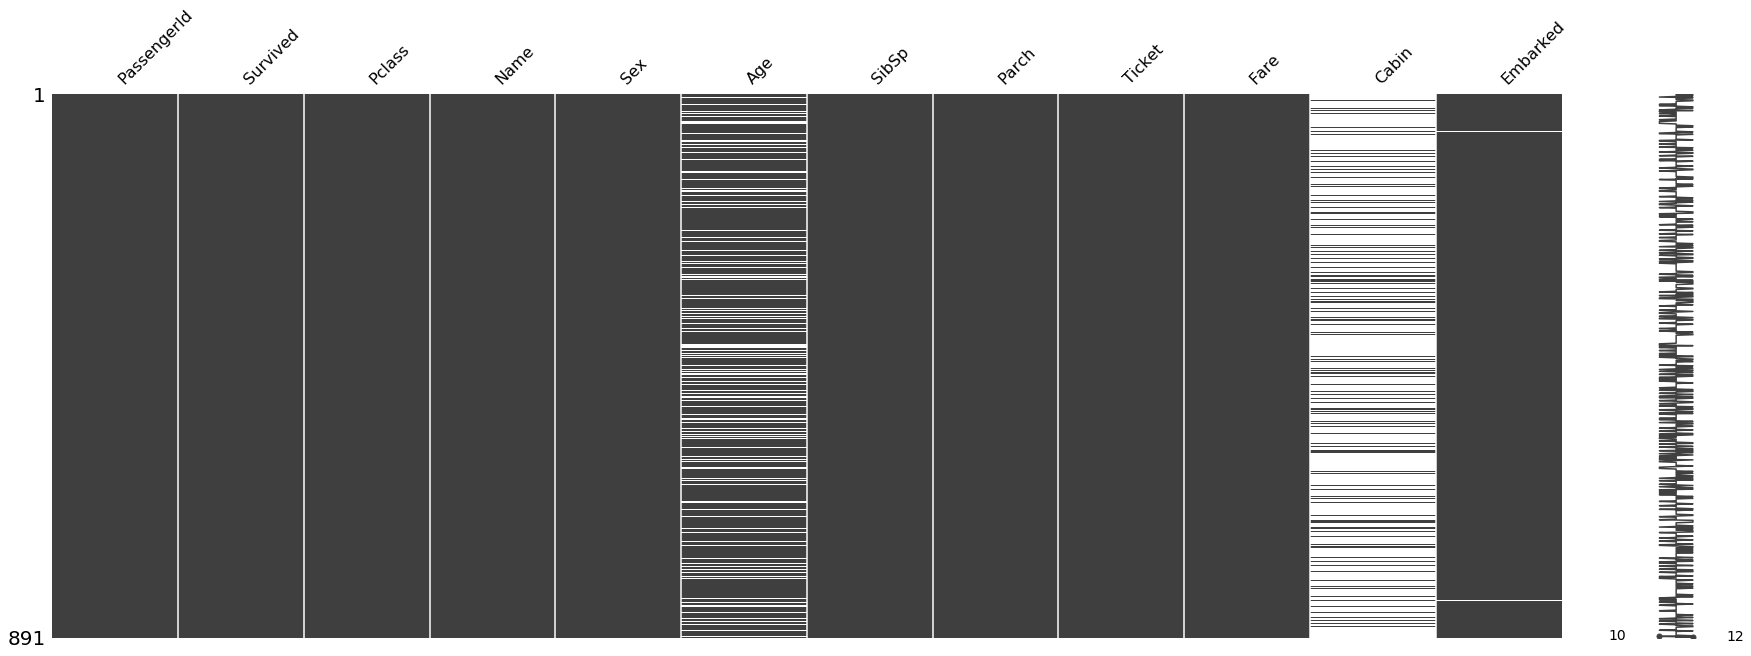

In [7]:
import missingno
missingno.matrix(train, figsize=(30,10))

In [8]:
df_new = pd.DataFrame()

In [9]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### how many people survived?

0    549
1    342
Name: Survived, dtype: int64


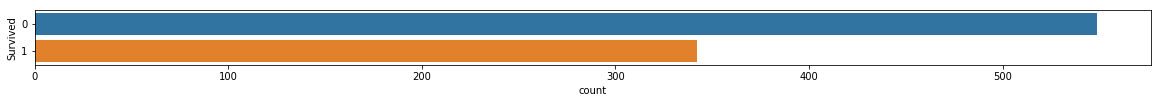

In [10]:
import seaborn as sns
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [11]:
df_new['Survived'] = train['Survived']
df_new.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Data Preparation

Prepare Data column wise and add the relevant features to new Dataframe  

In [12]:
[print(col) for col in train.columns]

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


[None, None, None, None, None, None, None, None, None, None, None, None]

###  Feature: "Passenger ID" 

In [13]:
print("Unique count : ", len(train['PassengerId'].unique()))

Unique count :  891


The "PassengerId" feature has a <b>891</b> unique values which is equal to the number of data points available<br>
Hence, Adding PassengerID wont add value to the final dataset for training model

###  Feature: "Pclass"

In [14]:
train.Pclass.isnull().sum()

0

In [15]:
df_new['Pclass'] = train['Pclass']

###  Feature: "Sex"

Male count :  577
Female count :  314


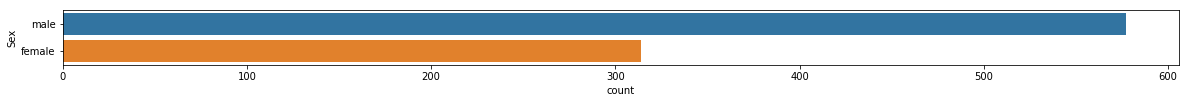

In [16]:
plt.figure(figsize=(20, 1))
sns.countplot(y="Sex", data=train);
print("Male count : ", len(train['Sex'][train['Sex'] == 'male']))
print("Female count : ", len(train['Sex'][train['Sex'] == 'female']))

In [17]:
train.Sex.isnull().sum()

0

In [18]:
df_new['Sex'] = train['Sex']

# first five row of df_new
df_new.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


##### Encode "Sex"  and convert categorical variable into numerical variable

In [19]:
from sklearn.preprocessing import LabelEncoder
df_new['Sex'] = LabelEncoder().fit_transform(df_new['Sex'])
df_new.head()

,Survived,Pclass,Sex
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1


In [20]:
plt.style.use('seaborn-whitegrid')

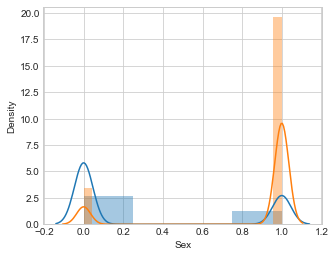

In [21]:
fig = plt.figure(figsize=(5, 4))
sns.distplot(df_new.loc[df_new['Survived'] == 1]['Sex'], kde_kws={'bw': 0.1,"label": "Survived"});
sns.distplot(df_new.loc[df_new['Survived'] == 0]['Sex'], kde_kws={'bw': 0.1,"label": "Did not Survived"});

###  Feature: "Age"

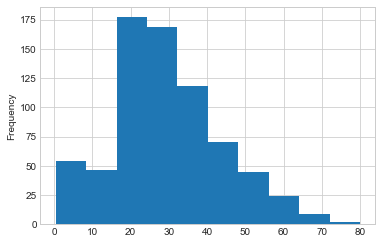

In [22]:
train.Age.plot.hist()

In [23]:
train.Age.isnull().sum()

177

There are missing values in this feature. We will revisit later to replace the missing values<br>
For now just ignore this feature

###  Feature: "SibSp"

In [24]:
print("Missing Value count: ", train.SibSp.isnull().sum())

sibSp_df = pd.DataFrame(train.groupby('SibSp')['SibSp'].apply(len))

Missing Value count:  0


In [25]:
sibSp_df

,SibSp
SibSp,
0,608
1,209
2,28
3,16
4,18
5,5
8,7


### Function to create count and distribution visualisations

In [26]:
def plot_count_dist(data, label_column, target_column, figsize=(20, 5)):
    fig = plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    sns.countplot(y=target_column, data=data);
    plt.subplot(1, 2, 2)
    sns.distplot(data.loc[data[label_column] == 1][target_column], 
                 kde_kws={'bw': 0.2,"label": "Survived"});
    sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={'bw': 0.2,"label": "Did not survive"});

Visualise the counts of SibSp and the distribution of <b>SibSp</b> against <b>Survival</b>

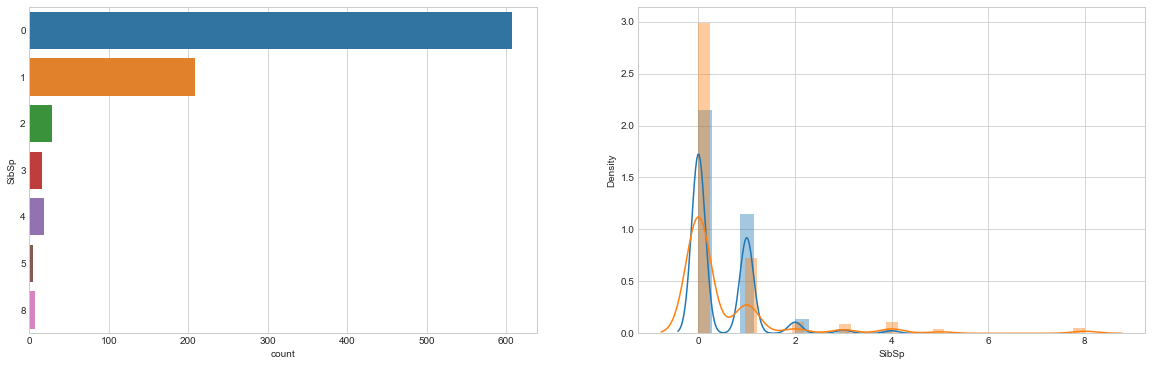

In [27]:
plot_count_dist(train, label_column='Survived', target_column='SibSp', figsize=(20,6))

In [28]:
df_new['SibSp'] = train['SibSp']

###  Feature: "Parch"

In [29]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

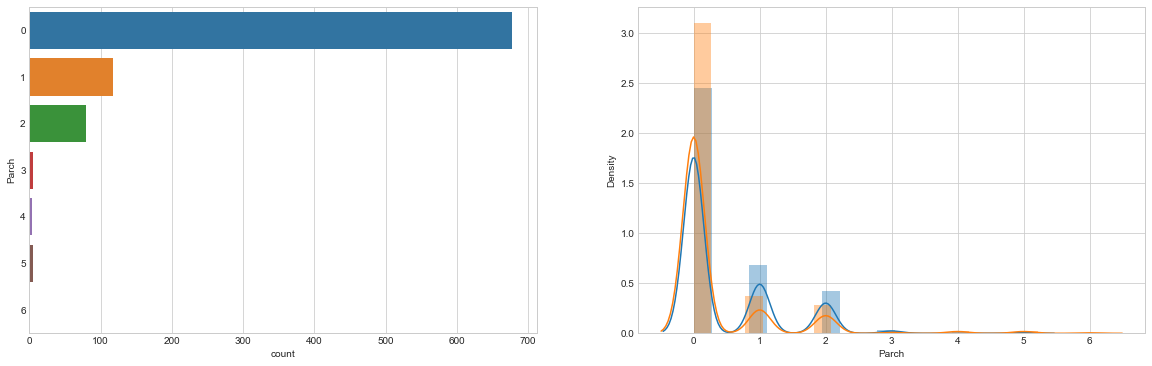

In [30]:
#Visualize the counts of Parch and distribution of values against #Survival
plot_count_dist(train,label_column='Survived',target_column='Parch',figsize=(20,6))

In [31]:
train.Parch.isnull().sum()

0

In [32]:
df_new['Parch'] = train['Parch']

###  Feature: "Ticket"

In [33]:
train.Ticket.value_counts()

347082             7
CA. 2343           7
1601               7
CA 2144            6
347088             6
                  ..
SOTON/OQ 392090    1
28134              1
244361             1
36865              1
2672               1
Name: Ticket, Length: 681, dtype: int64

In [34]:
train.Ticket.isnull().sum()

0

Here length of train.Ticket.value_counts() is 681 which is <b>too many unique values</b> for now. Let’s not include this feature in new subset data frame.

### Feature: "Fare"

In [35]:
train.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [36]:
print(train.Fare.isnull().sum())
train.Fare.dtype

0


dtype('float64')

There are 248 different unique values in fare. Since fare is a numerical continious variable let’s add this feature to our new subset data frame.

In [37]:
df_new['Fare'] = train['Fare']

### Feature: Cabin

In [38]:
 train.Cabin.isnull().sum()

687

The code above returns 687.looks like there is 1/3 number of missing values in feature Cabin. So till we don’t have expert advice we do not fill the missing values, rather do not use it for the model right now. Let’s go to the next feature.

### Feature: Embarked

In [39]:
train.Embarked.isnull().sum()

2

There are only 2 missing values in Embarked feature. We can just drop these line items as it wont have any major impact on our training data

In [40]:
# Add embarked to new data frame
df_new['Embarked'] = train['Embarked']

In [41]:
# Remove the rows where Embarked field is null 
print("line item count: ", len(df_new))
df_new = df_new.dropna(subset=['Embarked'])
print("Updated line item count: ", len(df_new))

line item count:  891
Updated line item count:  889


In [42]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

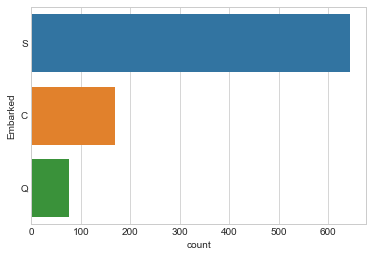

In [43]:
sns.countplot(y='Embarked', data=train);

In [44]:
df_new.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,1,1,0,7.2500,S
1,1,1,0,1,0,71.2833,C
2,1,3,0,0,0,7.9250,S
3,1,1,0,1,0,53.1000,S
4,0,3,1,0,0,8.0500,S


### Feature Encoding

In [45]:
# one hot encode the categorical features

df_pclass_one_hot = pd.get_dummies(df_new['Pclass'], prefix='pclass')
df_sex_one_hot = pd.get_dummies(df_new['Sex'], prefix='sex')
df_Embarked_one_hot = pd.get_dummies(df_new['Embarked'], prefix='embarked') 

In [46]:
df_new_enc = pd.concat([df_new,
                        df_Embarked_one_hot,
                        df_pclass_one_hot,
                        df_sex_one_hot], axis=1)

# Drop the original categorical features from the dataframe 
df_new_enc = df_new_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [47]:
df_new_enc.head(10)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3,sex_0,sex_1
0,0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,1,0,53.1000,0,0,1,1,0,0,1,0
4,0,0,0,8.0500,0,0,1,0,0,1,0,1
5,0,0,0,8.4583,0,1,0,0,0,1,0,1
6,0,0,0,51.8625,0,0,1,1,0,0,0,1
7,0,3,1,21.0750,0,0,1,0,0,1,0,1
8,1,0,2,11.1333,0,0,1,0,0,1,1,0
9,1,1,0,30.0708,1,0,0,0,1,0,1,0


### Start Building Machine Learning Models:

In [48]:
# Seclect the dataframe we want to use for predictions
selected_df = df_new_enc
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3,sex_0,sex_1
0,0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,1,0,53.1000,0,0,1,1,0,0,1,0
4,0,0,0,8.0500,0,0,1,0,0,1,0,1


In [49]:
X_train = selected_df.drop('Survived', axis=1)
y_train = selected_df.Survived

### Define a function to fit a machine learning algorithms:
Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs.

In [50]:
# Import all the important libraries from Sklearn we will use here

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from catboost import CatBoostClassifier, Pool, cv

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [52]:
from sklearn import metrics

In [53]:
import time, datetime

In [54]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train)*100, 2)
    
    # Cross Validation
    train_pred = cross_val_predict(algo, X_train, y_train, cv=cv, n_jobs=-1)
    
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred)*100, 2)
    
    return train_pred, acc, acc_cv

### Logistic Regression

In [55]:
start_time = time.time()
train_pred_log, acc_log, acc_log_cv = fit_ml_algo(LogisticRegression(), X_train, y_train, 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_log_cv)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:04.407046


### K-Nearest Neighbours

In [56]:
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), X_train, y_train, 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 83.46
Accuracy CV 10-Fold: 76.72
Running Time: 0:00:00.143571


### Gaussian Naive Bayes

In [57]:
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), X_train, y_train, 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.057026


### Linear Support Vector Machines (SVC)

In [58]:
start_time = time.time()
train_pred_svc, acc_svc, acc_cv_svc = fit_ml_algo(LinearSVC(), X_train, y_train, 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_svc)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 78.18
Accuracy CV 10-Fold: 74.8
Running Time: 0:00:00.170988


### Stochastic Gradient Descent

In [59]:
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), X_train, y_train, 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 66.14
Accuracy CV 10-Fold: 68.73
Running Time: 0:00:00.057005


### Decision Tree Classifier

In [60]:
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), X_train, y_train, 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.43
Running Time: 0:00:00.089030


### Random Forest Classifier

In [61]:
start_time = time.time()
train_pred_rf, acc_rf, acc_cv_rf = fit_ml_algo(RandomForestClassifier(n_estimators=10, max_depth=10)
                                            , X_train, y_train, 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 89.99
Accuracy CV 10-Fold: 81.1
Running Time: 0:00:00.138326


### Gradient Boost Trees

In [62]:
start_time = time.time()
train_pred_gb, acc_gb, acc_cv_gb = fit_ml_algo(GradientBoostingClassifier(), X_train, y_train, 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 89.99
Accuracy CV 10-Fold: 81.1
Running Time: 0:00:00.367388


### Catboost Algorithm

In [65]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3,sex_0,sex_1
0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,0,71.2833,1,0,0,1,0,0,1,0
2,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,0,53.1000,0,0,1,1,0,0,1,0
4,0,0,8.0500,0,0,1,0,0,1,0,1


In [66]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [67]:
cat_features = np.where(X_train.dtypes != float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [68]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')
# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)
# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6862830	total: 164ms	remaining: 2m 43s
1:	learn: 0.6809444	total: 198ms	remaining: 1m 38s
2:	learn: 0.6754243	total: 221ms	remaining: 1m 13s
3:	learn: 0.6698913	total: 252ms	remaining: 1m 2s
4:	learn: 0.6665106	total: 266ms	remaining: 53s
5:	learn: 0.6631688	total: 289ms	remaining: 47.9s
6:	learn: 0.6573565	total: 313ms	remaining: 44.4s
7:	learn: 0.6522363	total: 337ms	remaining: 41.7s
8:	learn: 0.6468731	total: 379ms	remaining: 41.8s
9:	learn: 0.6415638	total: 427ms	remaining: 42.3s
10:	learn: 0.6362485	total: 456ms	remaining: 41s
11:	learn: 0.6311530	total: 482ms	remaining: 39.7s
12:	learn: 0.6262305	total: 509ms	remaining: 38.7s
13:	learn: 0.6216309	total: 537ms	remaining: 37.8s
14:	learn: 0.6174660	total: 563ms	remaining: 37s
15:	learn: 0.6127299	total: 592ms	remaining: 36.4s
16:	learn: 0.6082183	total: 633ms	remaining: 36.6s
17:	learn: 0.6045667	total: 663ms	remaining: 36.1s
18:	learn: 0.6005999	total: 692ms	remaining: 35.7s
19:	learn: 0.5

168:	learn: 0.4206575	total: 4.61s	remaining: 22.7s
169:	learn: 0.4203650	total: 4.65s	remaining: 22.7s
170:	learn: 0.4200069	total: 4.68s	remaining: 22.7s
171:	learn: 0.4195586	total: 4.7s	remaining: 22.6s
172:	learn: 0.4192460	total: 4.73s	remaining: 22.6s
173:	learn: 0.4190644	total: 4.78s	remaining: 22.7s
174:	learn: 0.4189064	total: 4.8s	remaining: 22.6s
175:	learn: 0.4184545	total: 4.84s	remaining: 22.7s
176:	learn: 0.4180404	total: 4.87s	remaining: 22.6s
177:	learn: 0.4177577	total: 4.9s	remaining: 22.6s
178:	learn: 0.4176905	total: 4.91s	remaining: 22.5s
179:	learn: 0.4174182	total: 4.93s	remaining: 22.5s
180:	learn: 0.4174044	total: 4.95s	remaining: 22.4s
181:	learn: 0.4172053	total: 4.98s	remaining: 22.4s
182:	learn: 0.4168108	total: 5.02s	remaining: 22.4s
183:	learn: 0.4165931	total: 5.04s	remaining: 22.4s
184:	learn: 0.4164770	total: 5.07s	remaining: 22.3s
185:	learn: 0.4158157	total: 5.09s	remaining: 22.3s
186:	learn: 0.4157047	total: 5.13s	remaining: 22.3s
187:	learn: 0.4

333:	learn: 0.3919265	total: 8.93s	remaining: 17.8s
334:	learn: 0.3919022	total: 8.94s	remaining: 17.8s
335:	learn: 0.3918117	total: 8.98s	remaining: 17.8s
336:	learn: 0.3917695	total: 9.01s	remaining: 17.7s
337:	learn: 0.3917662	total: 9.02s	remaining: 17.7s
338:	learn: 0.3917635	total: 9.02s	remaining: 17.6s
339:	learn: 0.3917630	total: 9.03s	remaining: 17.5s
340:	learn: 0.3916542	total: 9.06s	remaining: 17.5s
341:	learn: 0.3915670	total: 9.08s	remaining: 17.5s
342:	learn: 0.3915185	total: 9.11s	remaining: 17.4s
343:	learn: 0.3914679	total: 9.13s	remaining: 17.4s
344:	learn: 0.3914457	total: 9.16s	remaining: 17.4s
345:	learn: 0.3913624	total: 9.18s	remaining: 17.4s
346:	learn: 0.3912501	total: 9.2s	remaining: 17.3s
347:	learn: 0.3912395	total: 9.23s	remaining: 17.3s
348:	learn: 0.3912359	total: 9.24s	remaining: 17.2s
349:	learn: 0.3911120	total: 9.27s	remaining: 17.2s
350:	learn: 0.3909921	total: 9.31s	remaining: 17.2s
351:	learn: 0.3907251	total: 9.34s	remaining: 17.2s
352:	learn: 0

498:	learn: 0.3782544	total: 13.1s	remaining: 13.1s
499:	learn: 0.3780040	total: 13.1s	remaining: 13.1s
500:	learn: 0.3779846	total: 13.1s	remaining: 13.1s
501:	learn: 0.3778706	total: 13.1s	remaining: 13s
502:	learn: 0.3777371	total: 13.2s	remaining: 13s
503:	learn: 0.3775955	total: 13.2s	remaining: 13s
504:	learn: 0.3775337	total: 13.3s	remaining: 13s
505:	learn: 0.3774674	total: 13.3s	remaining: 13s
506:	learn: 0.3774419	total: 13.3s	remaining: 13s
507:	learn: 0.3774419	total: 13.3s	remaining: 12.9s
508:	learn: 0.3774104	total: 13.3s	remaining: 12.9s
509:	learn: 0.3773054	total: 13.4s	remaining: 12.8s
510:	learn: 0.3772544	total: 13.4s	remaining: 12.8s
511:	learn: 0.3772544	total: 13.4s	remaining: 12.8s
512:	learn: 0.3772150	total: 13.4s	remaining: 12.8s
513:	learn: 0.3771087	total: 13.5s	remaining: 12.7s
514:	learn: 0.3770266	total: 13.5s	remaining: 12.7s
515:	learn: 0.3770078	total: 13.5s	remaining: 12.7s
516:	learn: 0.3769910	total: 13.5s	remaining: 12.6s
517:	learn: 0.3769351	to

659:	learn: 0.3658382	total: 17.6s	remaining: 9.08s
660:	learn: 0.3656704	total: 17.7s	remaining: 9.05s
661:	learn: 0.3656190	total: 17.7s	remaining: 9.04s
662:	learn: 0.3653745	total: 17.7s	remaining: 9.01s
663:	learn: 0.3653604	total: 17.7s	remaining: 8.97s
664:	learn: 0.3652726	total: 17.8s	remaining: 8.96s
665:	learn: 0.3651853	total: 17.8s	remaining: 8.94s
666:	learn: 0.3651144	total: 17.9s	remaining: 8.92s
667:	learn: 0.3650583	total: 17.9s	remaining: 8.9s
668:	learn: 0.3650571	total: 17.9s	remaining: 8.86s
669:	learn: 0.3649112	total: 17.9s	remaining: 8.84s
670:	learn: 0.3648948	total: 18s	remaining: 8.81s
671:	learn: 0.3648418	total: 18s	remaining: 8.78s
672:	learn: 0.3648324	total: 18s	remaining: 8.75s
673:	learn: 0.3648000	total: 18s	remaining: 8.73s
674:	learn: 0.3647507	total: 18.1s	remaining: 8.71s
675:	learn: 0.3646936	total: 18.1s	remaining: 8.69s
676:	learn: 0.3644274	total: 18.2s	remaining: 8.66s
677:	learn: 0.3643262	total: 18.2s	remaining: 8.64s
678:	learn: 0.3643166

819:	learn: 0.3545278	total: 22.1s	remaining: 4.84s
820:	learn: 0.3544710	total: 22.1s	remaining: 4.82s
821:	learn: 0.3544393	total: 22.1s	remaining: 4.79s
822:	learn: 0.3543899	total: 22.2s	remaining: 4.77s
823:	learn: 0.3543561	total: 22.2s	remaining: 4.74s
824:	learn: 0.3542940	total: 22.2s	remaining: 4.72s
825:	learn: 0.3542422	total: 22.3s	remaining: 4.69s
826:	learn: 0.3542422	total: 22.3s	remaining: 4.66s
827:	learn: 0.3541967	total: 22.3s	remaining: 4.63s
828:	learn: 0.3541155	total: 22.3s	remaining: 4.61s
829:	learn: 0.3539747	total: 22.4s	remaining: 4.58s
830:	learn: 0.3539131	total: 22.4s	remaining: 4.55s
831:	learn: 0.3538897	total: 22.4s	remaining: 4.53s
832:	learn: 0.3538387	total: 22.4s	remaining: 4.5s
833:	learn: 0.3537725	total: 22.5s	remaining: 4.47s
834:	learn: 0.3536675	total: 22.5s	remaining: 4.44s
835:	learn: 0.3534863	total: 22.5s	remaining: 4.42s
836:	learn: 0.3534691	total: 22.5s	remaining: 4.39s
837:	learn: 0.3533399	total: 22.6s	remaining: 4.36s
838:	learn: 0

982:	learn: 0.3425477	total: 27.2s	remaining: 470ms
983:	learn: 0.3425025	total: 27.2s	remaining: 442ms
984:	learn: 0.3424251	total: 27.2s	remaining: 415ms
985:	learn: 0.3424099	total: 27.3s	remaining: 387ms
986:	learn: 0.3422907	total: 27.3s	remaining: 359ms
987:	learn: 0.3422456	total: 27.3s	remaining: 332ms
988:	learn: 0.3422078	total: 27.4s	remaining: 304ms
989:	learn: 0.3421334	total: 27.4s	remaining: 277ms
990:	learn: 0.3418983	total: 27.5s	remaining: 249ms
991:	learn: 0.3418657	total: 27.5s	remaining: 222ms
992:	learn: 0.3418107	total: 27.5s	remaining: 194ms
993:	learn: 0.3416609	total: 27.5s	remaining: 166ms
994:	learn: 0.3415820	total: 27.6s	remaining: 139ms
995:	learn: 0.3415283	total: 27.6s	remaining: 111ms
996:	learn: 0.3414583	total: 27.6s	remaining: 83.1ms
997:	learn: 0.3413214	total: 27.7s	remaining: 55.4ms
998:	learn: 0.3410607	total: 27.7s	remaining: 27.7ms
999:	learn: 0.3409993	total: 27.7s	remaining: 0us


In [69]:
start_time = time.time()
# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()
# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)
# How long did it take?
catboost_time = (time.time() - start_time)
# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]
0:	learn: 0.6739506	test: 0.6775326	best: 0.6775326 (0)	total: 43.1ms	remaining: 43.1s
1:	learn: 0.6546146	test: 0.6625133	best: 0.6625133 (1)	total: 80.1ms	remaining: 40s
2:	learn: 0.6371072	test: 0.6501693	best: 0.6501693 (2)	total: 156ms	remaining: 51.9s
3:	learn: 0.6236123	test: 0.6385877	best: 0.6385877 (3)	total: 193ms	remaining: 48s
4:	learn: 0.6069469	test: 0.6255501	best: 0.6255501 (4)	total: 251ms	remaining: 49.9s
5:	learn: 0.5928798	test: 0.6154399	best: 0.6154399 (5)	total: 276ms	remaining: 45.8s
6:	learn: 0.5825505	test: 0.6076271	best: 0.6076271 (6)	total: 292ms	remaining: 41.5s
7:	learn: 0.5743896	test: 0.6011319	best: 0.6011319 (7)	total: 308ms	remaining: 38.2s
8:	learn: 0.5645742	test: 0.5935400	best: 0.5935400 (8)	total: 332ms	remaining: 36.5s
9:	learn: 0.5557301	test: 0.5860742	best: 0.5860742 (9)	total: 355ms	remaining: 35.1s
10:	learn: 0.5450084	test: 0.5794033	best: 0.5794033 (10)	total: 386ms	remaining: 34.7s
11:	learn: 0.5369276	test: 0.5

98:	learn: 0.3774768	test: 0.4960761	best: 0.4947073 (90)	total: 3.67s	remaining: 33.4s
99:	learn: 0.3773090	test: 0.4962159	best: 0.4947073 (90)	total: 3.72s	remaining: 33.5s
100:	learn: 0.3771555	test: 0.4956691	best: 0.4947073 (90)	total: 3.76s	remaining: 33.4s
101:	learn: 0.3768797	test: 0.4955682	best: 0.4947073 (90)	total: 3.79s	remaining: 33.4s
102:	learn: 0.3763059	test: 0.4954836	best: 0.4947073 (90)	total: 3.82s	remaining: 33.3s
103:	learn: 0.3762837	test: 0.4954124	best: 0.4947073 (90)	total: 3.83s	remaining: 33s
104:	learn: 0.3760058	test: 0.4957055	best: 0.4947073 (90)	total: 3.86s	remaining: 32.9s
105:	learn: 0.3759393	test: 0.4954995	best: 0.4947073 (90)	total: 3.89s	remaining: 32.8s
106:	learn: 0.3759327	test: 0.4955003	best: 0.4947073 (90)	total: 3.9s	remaining: 32.6s
107:	learn: 0.3758268	test: 0.4955255	best: 0.4947073 (90)	total: 3.92s	remaining: 32.4s
108:	learn: 0.3755542	test: 0.4958938	best: 0.4947073 (90)	total: 3.95s	remaining: 32.3s
109:	learn: 0.3752145	test

191:	learn: 0.3584891	test: 0.4966631	best: 0.4947073 (90)	total: 6.19s	remaining: 26s
192:	learn: 0.3583035	test: 0.4965858	best: 0.4947073 (90)	total: 6.22s	remaining: 26s
193:	learn: 0.3575968	test: 0.4960199	best: 0.4947073 (90)	total: 6.25s	remaining: 26s
194:	learn: 0.3574431	test: 0.4960637	best: 0.4947073 (90)	total: 6.28s	remaining: 25.9s
195:	learn: 0.3571940	test: 0.4958809	best: 0.4947073 (90)	total: 6.31s	remaining: 25.9s
196:	learn: 0.3568909	test: 0.4962566	best: 0.4947073 (90)	total: 6.34s	remaining: 25.8s
197:	learn: 0.3567465	test: 0.4962746	best: 0.4947073 (90)	total: 6.37s	remaining: 25.8s
198:	learn: 0.3563431	test: 0.4960117	best: 0.4947073 (90)	total: 6.4s	remaining: 25.8s
199:	learn: 0.3561389	test: 0.4961207	best: 0.4947073 (90)	total: 6.44s	remaining: 25.8s
200:	learn: 0.3557763	test: 0.4964979	best: 0.4947073 (90)	total: 6.48s	remaining: 25.8s
201:	learn: 0.3557674	test: 0.4963728	best: 0.4947073 (90)	total: 6.49s	remaining: 25.7s
202:	learn: 0.3556614	test: 

290:	learn: 0.3317948	test: 0.4916630	best: 0.4913424 (284)	total: 9.53s	remaining: 23.2s
291:	learn: 0.3316290	test: 0.4919078	best: 0.4913424 (284)	total: 9.56s	remaining: 23.2s
292:	learn: 0.3310419	test: 0.4920180	best: 0.4913424 (284)	total: 9.59s	remaining: 23.1s
293:	learn: 0.3306810	test: 0.4913913	best: 0.4913424 (284)	total: 9.63s	remaining: 23.1s
294:	learn: 0.3304858	test: 0.4919722	best: 0.4913424 (284)	total: 9.66s	remaining: 23.1s
295:	learn: 0.3303209	test: 0.4919428	best: 0.4913424 (284)	total: 9.69s	remaining: 23s
296:	learn: 0.3300613	test: 0.4918561	best: 0.4913424 (284)	total: 9.72s	remaining: 23s
297:	learn: 0.3300397	test: 0.4918534	best: 0.4913424 (284)	total: 9.75s	remaining: 23s
298:	learn: 0.3293023	test: 0.4908994	best: 0.4908994 (298)	total: 9.78s	remaining: 22.9s
299:	learn: 0.3288908	test: 0.4909713	best: 0.4908994 (298)	total: 9.8s	remaining: 22.9s
300:	learn: 0.3288799	test: 0.4909275	best: 0.4908994 (298)	total: 9.83s	remaining: 22.8s
301:	learn: 0.328

387:	learn: 0.3061345	test: 0.4846417	best: 0.4845824 (386)	total: 13s	remaining: 20.5s
388:	learn: 0.3061111	test: 0.4843929	best: 0.4843929 (388)	total: 13.1s	remaining: 20.5s
389:	learn: 0.3060113	test: 0.4844457	best: 0.4843929 (388)	total: 13.1s	remaining: 20.5s
390:	learn: 0.3059053	test: 0.4847744	best: 0.4843929 (388)	total: 13.1s	remaining: 20.5s
391:	learn: 0.3054198	test: 0.4845142	best: 0.4843929 (388)	total: 13.2s	remaining: 20.5s
392:	learn: 0.3054072	test: 0.4843686	best: 0.4843686 (392)	total: 13.2s	remaining: 20.5s
393:	learn: 0.3052268	test: 0.4841394	best: 0.4841394 (393)	total: 13.3s	remaining: 20.4s
394:	learn: 0.3048868	test: 0.4845816	best: 0.4841394 (393)	total: 13.3s	remaining: 20.4s
395:	learn: 0.3046469	test: 0.4841486	best: 0.4841394 (393)	total: 13.3s	remaining: 20.4s
396:	learn: 0.3046173	test: 0.4842276	best: 0.4841394 (393)	total: 13.4s	remaining: 20.3s
397:	learn: 0.3045570	test: 0.4842334	best: 0.4841394 (393)	total: 13.4s	remaining: 20.3s
398:	learn: 

486:	learn: 0.2864808	test: 0.4827344	best: 0.4806654 (459)	total: 16.6s	remaining: 17.4s
487:	learn: 0.2862897	test: 0.4823991	best: 0.4806654 (459)	total: 16.6s	remaining: 17.4s
488:	learn: 0.2859027	test: 0.4824371	best: 0.4806654 (459)	total: 16.6s	remaining: 17.4s
489:	learn: 0.2858049	test: 0.4828463	best: 0.4806654 (459)	total: 16.7s	remaining: 17.4s
490:	learn: 0.2855562	test: 0.4827266	best: 0.4806654 (459)	total: 16.7s	remaining: 17.3s
491:	learn: 0.2854338	test: 0.4826919	best: 0.4806654 (459)	total: 16.7s	remaining: 17.3s
492:	learn: 0.2853407	test: 0.4826543	best: 0.4806654 (459)	total: 16.8s	remaining: 17.3s
493:	learn: 0.2852789	test: 0.4824097	best: 0.4806654 (459)	total: 16.8s	remaining: 17.2s
494:	learn: 0.2849009	test: 0.4826594	best: 0.4806654 (459)	total: 16.8s	remaining: 17.2s
495:	learn: 0.2847298	test: 0.4826158	best: 0.4806654 (459)	total: 16.9s	remaining: 17.1s
496:	learn: 0.2846758	test: 0.4826767	best: 0.4806654 (459)	total: 16.9s	remaining: 17.1s
497:	learn

582:	learn: 0.2674369	test: 0.4836534	best: 0.4806654 (459)	total: 20.1s	remaining: 14.3s
583:	learn: 0.2671354	test: 0.4836584	best: 0.4806654 (459)	total: 20.1s	remaining: 14.3s
584:	learn: 0.2667217	test: 0.4831853	best: 0.4806654 (459)	total: 20.1s	remaining: 14.3s
585:	learn: 0.2665473	test: 0.4831681	best: 0.4806654 (459)	total: 20.2s	remaining: 14.2s
586:	learn: 0.2662737	test: 0.4829464	best: 0.4806654 (459)	total: 20.2s	remaining: 14.2s
587:	learn: 0.2660712	test: 0.4828807	best: 0.4806654 (459)	total: 20.3s	remaining: 14.2s
588:	learn: 0.2659490	test: 0.4829830	best: 0.4806654 (459)	total: 20.3s	remaining: 14.2s
589:	learn: 0.2657464	test: 0.4827054	best: 0.4806654 (459)	total: 20.3s	remaining: 14.1s
590:	learn: 0.2656716	test: 0.4827494	best: 0.4806654 (459)	total: 20.4s	remaining: 14.1s
591:	learn: 0.2653074	test: 0.4831736	best: 0.4806654 (459)	total: 20.4s	remaining: 14.1s
592:	learn: 0.2652532	test: 0.4832398	best: 0.4806654 (459)	total: 20.4s	remaining: 14s
593:	learn: 

679:	learn: 0.2529454	test: 0.4823954	best: 0.4806654 (459)	total: 23.3s	remaining: 11s
680:	learn: 0.2528695	test: 0.4823662	best: 0.4806654 (459)	total: 23.3s	remaining: 10.9s
681:	learn: 0.2527892	test: 0.4823083	best: 0.4806654 (459)	total: 23.3s	remaining: 10.9s
682:	learn: 0.2526769	test: 0.4821770	best: 0.4806654 (459)	total: 23.4s	remaining: 10.9s
683:	learn: 0.2524079	test: 0.4824483	best: 0.4806654 (459)	total: 23.5s	remaining: 10.8s
684:	learn: 0.2520285	test: 0.4823158	best: 0.4806654 (459)	total: 23.5s	remaining: 10.8s
685:	learn: 0.2519547	test: 0.4822970	best: 0.4806654 (459)	total: 23.6s	remaining: 10.8s
686:	learn: 0.2518870	test: 0.4823719	best: 0.4806654 (459)	total: 23.6s	remaining: 10.7s
687:	learn: 0.2518501	test: 0.4825096	best: 0.4806654 (459)	total: 23.6s	remaining: 10.7s
688:	learn: 0.2517227	test: 0.4825242	best: 0.4806654 (459)	total: 23.6s	remaining: 10.7s
689:	learn: 0.2516269	test: 0.4823451	best: 0.4806654 (459)	total: 23.7s	remaining: 10.6s
690:	learn: 

774:	learn: 0.2413280	test: 0.4825308	best: 0.4806458 (760)	total: 26.7s	remaining: 7.76s
775:	learn: 0.2412061	test: 0.4829238	best: 0.4806458 (760)	total: 26.7s	remaining: 7.72s
776:	learn: 0.2411578	test: 0.4829101	best: 0.4806458 (760)	total: 26.8s	remaining: 7.68s
777:	learn: 0.2411008	test: 0.4829558	best: 0.4806458 (760)	total: 26.8s	remaining: 7.65s
778:	learn: 0.2408969	test: 0.4829606	best: 0.4806458 (760)	total: 26.8s	remaining: 7.61s
779:	learn: 0.2407884	test: 0.4833765	best: 0.4806458 (760)	total: 26.9s	remaining: 7.58s
780:	learn: 0.2406718	test: 0.4830990	best: 0.4806458 (760)	total: 26.9s	remaining: 7.54s
781:	learn: 0.2405204	test: 0.4827067	best: 0.4806458 (760)	total: 26.9s	remaining: 7.51s
782:	learn: 0.2403670	test: 0.4825359	best: 0.4806458 (760)	total: 27s	remaining: 7.47s
783:	learn: 0.2400898	test: 0.4826711	best: 0.4806458 (760)	total: 27s	remaining: 7.44s
784:	learn: 0.2400717	test: 0.4826665	best: 0.4806458 (760)	total: 27s	remaining: 7.4s
785:	learn: 0.239

871:	learn: 0.2305234	test: 0.4799655	best: 0.4799417 (869)	total: 30s	remaining: 4.4s
872:	learn: 0.2304758	test: 0.4799607	best: 0.4799417 (869)	total: 30s	remaining: 4.36s
873:	learn: 0.2303925	test: 0.4799627	best: 0.4799417 (869)	total: 30s	remaining: 4.33s
874:	learn: 0.2303611	test: 0.4799248	best: 0.4799248 (874)	total: 30s	remaining: 4.29s
875:	learn: 0.2302954	test: 0.4801140	best: 0.4799248 (874)	total: 30.1s	remaining: 4.26s
876:	learn: 0.2300887	test: 0.4799799	best: 0.4799248 (874)	total: 30.1s	remaining: 4.22s
877:	learn: 0.2300285	test: 0.4799546	best: 0.4799248 (874)	total: 30.1s	remaining: 4.19s
878:	learn: 0.2299700	test: 0.4798946	best: 0.4798946 (878)	total: 30.2s	remaining: 4.16s
879:	learn: 0.2298856	test: 0.4802173	best: 0.4798946 (878)	total: 30.2s	remaining: 4.12s
880:	learn: 0.2298047	test: 0.4805388	best: 0.4798946 (878)	total: 30.2s	remaining: 4.08s
881:	learn: 0.2297185	test: 0.4807280	best: 0.4798946 (878)	total: 30.3s	remaining: 4.05s
882:	learn: 0.22964

968:	learn: 0.2208756	test: 0.4789450	best: 0.4771111 (941)	total: 33.3s	remaining: 1.07s
969:	learn: 0.2208275	test: 0.4789454	best: 0.4771111 (941)	total: 33.4s	remaining: 1.03s
970:	learn: 0.2207780	test: 0.4789410	best: 0.4771111 (941)	total: 33.4s	remaining: 998ms
971:	learn: 0.2206897	test: 0.4788966	best: 0.4771111 (941)	total: 33.5s	remaining: 964ms
972:	learn: 0.2205551	test: 0.4790514	best: 0.4771111 (941)	total: 33.5s	remaining: 929ms
973:	learn: 0.2205332	test: 0.4792606	best: 0.4771111 (941)	total: 33.5s	remaining: 894ms
974:	learn: 0.2204725	test: 0.4793640	best: 0.4771111 (941)	total: 33.5s	remaining: 860ms
975:	learn: 0.2203622	test: 0.4798241	best: 0.4771111 (941)	total: 33.6s	remaining: 826ms
976:	learn: 0.2202793	test: 0.4797617	best: 0.4771111 (941)	total: 33.6s	remaining: 791ms
977:	learn: 0.2202281	test: 0.4797420	best: 0.4771111 (941)	total: 33.6s	remaining: 756ms
978:	learn: 0.2198828	test: 0.4795539	best: 0.4771111 (941)	total: 33.7s	remaining: 723ms
979:	learn

66:	learn: 0.4053579	test: 0.4555328	best: 0.4555328 (66)	total: 2.37s	remaining: 33.1s
67:	learn: 0.4049448	test: 0.4557580	best: 0.4555328 (66)	total: 2.41s	remaining: 33s
68:	learn: 0.4045100	test: 0.4561727	best: 0.4555328 (66)	total: 2.43s	remaining: 32.8s
69:	learn: 0.4038590	test: 0.4560523	best: 0.4555328 (66)	total: 2.47s	remaining: 32.8s
70:	learn: 0.4028375	test: 0.4561071	best: 0.4555328 (66)	total: 2.58s	remaining: 33.8s
71:	learn: 0.4023554	test: 0.4559769	best: 0.4555328 (66)	total: 2.61s	remaining: 33.7s
72:	learn: 0.4019650	test: 0.4560322	best: 0.4555328 (66)	total: 2.65s	remaining: 33.7s
73:	learn: 0.4009087	test: 0.4548728	best: 0.4548728 (73)	total: 2.7s	remaining: 33.8s
74:	learn: 0.4005530	test: 0.4548764	best: 0.4548728 (73)	total: 2.73s	remaining: 33.7s
75:	learn: 0.4002620	test: 0.4548629	best: 0.4548629 (75)	total: 2.76s	remaining: 33.5s
76:	learn: 0.3993710	test: 0.4540188	best: 0.4540188 (76)	total: 2.79s	remaining: 33.4s
77:	learn: 0.3987702	test: 0.454567

161:	learn: 0.3677706	test: 0.4502119	best: 0.4499505 (107)	total: 5.56s	remaining: 28.8s
162:	learn: 0.3677561	test: 0.4502300	best: 0.4499505 (107)	total: 5.58s	remaining: 28.7s
163:	learn: 0.3675902	test: 0.4503239	best: 0.4499505 (107)	total: 5.61s	remaining: 28.6s
164:	learn: 0.3670144	test: 0.4502987	best: 0.4499505 (107)	total: 5.63s	remaining: 28.5s
165:	learn: 0.3670143	test: 0.4503075	best: 0.4499505 (107)	total: 5.65s	remaining: 28.4s
166:	learn: 0.3667685	test: 0.4502507	best: 0.4499505 (107)	total: 5.73s	remaining: 28.6s
167:	learn: 0.3661427	test: 0.4500788	best: 0.4499505 (107)	total: 5.76s	remaining: 28.5s
168:	learn: 0.3658398	test: 0.4498650	best: 0.4498650 (168)	total: 5.79s	remaining: 28.5s
169:	learn: 0.3655063	test: 0.4500649	best: 0.4498650 (168)	total: 5.82s	remaining: 28.4s
170:	learn: 0.3654254	test: 0.4499536	best: 0.4498650 (168)	total: 5.84s	remaining: 28.3s
171:	learn: 0.3651555	test: 0.4499403	best: 0.4498650 (168)	total: 5.86s	remaining: 28.2s
172:	learn

257:	learn: 0.3434227	test: 0.4504829	best: 0.4485759 (212)	total: 8.55s	remaining: 24.6s
258:	learn: 0.3432412	test: 0.4505600	best: 0.4485759 (212)	total: 8.58s	remaining: 24.5s
259:	learn: 0.3429247	test: 0.4506450	best: 0.4485759 (212)	total: 8.62s	remaining: 24.5s
260:	learn: 0.3426535	test: 0.4504116	best: 0.4485759 (212)	total: 8.65s	remaining: 24.5s
261:	learn: 0.3422198	test: 0.4504471	best: 0.4485759 (212)	total: 8.68s	remaining: 24.4s
262:	learn: 0.3420044	test: 0.4501501	best: 0.4485759 (212)	total: 8.71s	remaining: 24.4s
263:	learn: 0.3418880	test: 0.4499347	best: 0.4485759 (212)	total: 8.73s	remaining: 24.4s
264:	learn: 0.3412930	test: 0.4497828	best: 0.4485759 (212)	total: 8.76s	remaining: 24.3s
265:	learn: 0.3408435	test: 0.4503082	best: 0.4485759 (212)	total: 8.79s	remaining: 24.3s
266:	learn: 0.3408016	test: 0.4503024	best: 0.4485759 (212)	total: 8.87s	remaining: 24.4s
267:	learn: 0.3406659	test: 0.4503021	best: 0.4485759 (212)	total: 8.9s	remaining: 24.3s
268:	learn:

350:	learn: 0.3201381	test: 0.4484519	best: 0.4481002 (346)	total: 11.7s	remaining: 21.7s
351:	learn: 0.3193838	test: 0.4487995	best: 0.4481002 (346)	total: 11.8s	remaining: 21.7s
352:	learn: 0.3192646	test: 0.4489670	best: 0.4481002 (346)	total: 11.8s	remaining: 21.6s
353:	learn: 0.3187545	test: 0.4492008	best: 0.4481002 (346)	total: 11.8s	remaining: 21.6s
354:	learn: 0.3185605	test: 0.4491226	best: 0.4481002 (346)	total: 11.9s	remaining: 21.5s
355:	learn: 0.3184587	test: 0.4491971	best: 0.4481002 (346)	total: 11.9s	remaining: 21.5s
356:	learn: 0.3181695	test: 0.4503541	best: 0.4481002 (346)	total: 11.9s	remaining: 21.5s
357:	learn: 0.3180678	test: 0.4502878	best: 0.4481002 (346)	total: 11.9s	remaining: 21.4s
358:	learn: 0.3179526	test: 0.4504601	best: 0.4481002 (346)	total: 12s	remaining: 21.4s
359:	learn: 0.3175293	test: 0.4508901	best: 0.4481002 (346)	total: 12s	remaining: 21.3s
360:	learn: 0.3171992	test: 0.4517679	best: 0.4481002 (346)	total: 12.2s	remaining: 21.5s
361:	learn: 0.

444:	learn: 0.2972933	test: 0.4530889	best: 0.4481002 (346)	total: 14.9s	remaining: 18.5s
445:	learn: 0.2971471	test: 0.4530223	best: 0.4481002 (346)	total: 14.9s	remaining: 18.5s
446:	learn: 0.2966623	test: 0.4532628	best: 0.4481002 (346)	total: 14.9s	remaining: 18.5s
447:	learn: 0.2965099	test: 0.4530545	best: 0.4481002 (346)	total: 15s	remaining: 18.5s
448:	learn: 0.2959727	test: 0.4528992	best: 0.4481002 (346)	total: 15s	remaining: 18.4s
449:	learn: 0.2954836	test: 0.4526014	best: 0.4481002 (346)	total: 15.1s	remaining: 18.4s
450:	learn: 0.2951620	test: 0.4524774	best: 0.4481002 (346)	total: 15.1s	remaining: 18.4s
451:	learn: 0.2951130	test: 0.4524090	best: 0.4481002 (346)	total: 15.1s	remaining: 18.4s
452:	learn: 0.2949524	test: 0.4526598	best: 0.4481002 (346)	total: 15.2s	remaining: 18.3s
453:	learn: 0.2948786	test: 0.4528276	best: 0.4481002 (346)	total: 15.2s	remaining: 18.3s
454:	learn: 0.2947420	test: 0.4528140	best: 0.4481002 (346)	total: 15.3s	remaining: 18.3s
455:	learn: 0.

538:	learn: 0.2764386	test: 0.4530893	best: 0.4481002 (346)	total: 18.1s	remaining: 15.5s
539:	learn: 0.2763555	test: 0.4530577	best: 0.4481002 (346)	total: 18.1s	remaining: 15.4s
540:	learn: 0.2759392	test: 0.4527898	best: 0.4481002 (346)	total: 18.2s	remaining: 15.4s
541:	learn: 0.2757269	test: 0.4525297	best: 0.4481002 (346)	total: 18.2s	remaining: 15.4s
542:	learn: 0.2756163	test: 0.4527988	best: 0.4481002 (346)	total: 18.3s	remaining: 15.4s
543:	learn: 0.2753956	test: 0.4539515	best: 0.4481002 (346)	total: 18.3s	remaining: 15.3s
544:	learn: 0.2749529	test: 0.4538121	best: 0.4481002 (346)	total: 18.3s	remaining: 15.3s
545:	learn: 0.2747242	test: 0.4542563	best: 0.4481002 (346)	total: 18.4s	remaining: 15.3s
546:	learn: 0.2745954	test: 0.4542646	best: 0.4481002 (346)	total: 18.4s	remaining: 15.2s
547:	learn: 0.2741752	test: 0.4541383	best: 0.4481002 (346)	total: 18.4s	remaining: 15.2s
548:	learn: 0.2738120	test: 0.4533913	best: 0.4481002 (346)	total: 18.5s	remaining: 15.2s
549:	learn

630:	learn: 0.2610744	test: 0.4571049	best: 0.4481002 (346)	total: 21.3s	remaining: 12.5s
631:	learn: 0.2608928	test: 0.4566866	best: 0.4481002 (346)	total: 21.3s	remaining: 12.4s
632:	learn: 0.2608203	test: 0.4566952	best: 0.4481002 (346)	total: 21.4s	remaining: 12.4s
633:	learn: 0.2604999	test: 0.4565170	best: 0.4481002 (346)	total: 21.4s	remaining: 12.4s
634:	learn: 0.2603917	test: 0.4565110	best: 0.4481002 (346)	total: 21.4s	remaining: 12.3s
635:	learn: 0.2602850	test: 0.4564564	best: 0.4481002 (346)	total: 21.5s	remaining: 12.3s
636:	learn: 0.2600758	test: 0.4565736	best: 0.4481002 (346)	total: 21.5s	remaining: 12.3s
637:	learn: 0.2599970	test: 0.4565669	best: 0.4481002 (346)	total: 21.5s	remaining: 12.2s
638:	learn: 0.2599919	test: 0.4565694	best: 0.4481002 (346)	total: 21.6s	remaining: 12.2s
639:	learn: 0.2598873	test: 0.4563770	best: 0.4481002 (346)	total: 21.6s	remaining: 12.1s
640:	learn: 0.2596932	test: 0.4566646	best: 0.4481002 (346)	total: 21.6s	remaining: 12.1s
641:	learn

729:	learn: 0.2466857	test: 0.4623250	best: 0.4481002 (346)	total: 24.6s	remaining: 9.1s
730:	learn: 0.2465826	test: 0.4623145	best: 0.4481002 (346)	total: 24.6s	remaining: 9.07s
731:	learn: 0.2465578	test: 0.4623191	best: 0.4481002 (346)	total: 24.7s	remaining: 9.04s
732:	learn: 0.2464811	test: 0.4623168	best: 0.4481002 (346)	total: 24.7s	remaining: 9s
733:	learn: 0.2464111	test: 0.4623355	best: 0.4481002 (346)	total: 24.8s	remaining: 8.98s
734:	learn: 0.2463156	test: 0.4623881	best: 0.4481002 (346)	total: 24.8s	remaining: 8.95s
735:	learn: 0.2462433	test: 0.4624628	best: 0.4481002 (346)	total: 24.8s	remaining: 8.91s
736:	learn: 0.2460792	test: 0.4623926	best: 0.4481002 (346)	total: 24.9s	remaining: 8.88s
737:	learn: 0.2459434	test: 0.4624169	best: 0.4481002 (346)	total: 24.9s	remaining: 8.85s
738:	learn: 0.2458994	test: 0.4622885	best: 0.4481002 (346)	total: 24.9s	remaining: 8.81s
739:	learn: 0.2457586	test: 0.4623639	best: 0.4481002 (346)	total: 25s	remaining: 8.77s
740:	learn: 0.24

826:	learn: 0.2351076	test: 0.4670543	best: 0.4481002 (346)	total: 27.9s	remaining: 5.83s
827:	learn: 0.2349399	test: 0.4675302	best: 0.4481002 (346)	total: 27.9s	remaining: 5.8s
828:	learn: 0.2349064	test: 0.4677008	best: 0.4481002 (346)	total: 27.9s	remaining: 5.76s
829:	learn: 0.2347220	test: 0.4681500	best: 0.4481002 (346)	total: 28s	remaining: 5.73s
830:	learn: 0.2344897	test: 0.4684505	best: 0.4481002 (346)	total: 28s	remaining: 5.7s
831:	learn: 0.2344192	test: 0.4685464	best: 0.4481002 (346)	total: 28s	remaining: 5.66s
832:	learn: 0.2342682	test: 0.4688203	best: 0.4481002 (346)	total: 28.1s	remaining: 5.63s
833:	learn: 0.2341664	test: 0.4688246	best: 0.4481002 (346)	total: 28.1s	remaining: 5.6s
834:	learn: 0.2340555	test: 0.4694703	best: 0.4481002 (346)	total: 28.1s	remaining: 5.56s
835:	learn: 0.2339329	test: 0.4696840	best: 0.4481002 (346)	total: 28.2s	remaining: 5.53s
836:	learn: 0.2338145	test: 0.4696190	best: 0.4481002 (346)	total: 28.2s	remaining: 5.5s
837:	learn: 0.233668

920:	learn: 0.2248022	test: 0.4738245	best: 0.4481002 (346)	total: 31.3s	remaining: 2.69s
921:	learn: 0.2246997	test: 0.4739509	best: 0.4481002 (346)	total: 31.4s	remaining: 2.65s
922:	learn: 0.2245766	test: 0.4743687	best: 0.4481002 (346)	total: 31.4s	remaining: 2.62s
923:	learn: 0.2244429	test: 0.4743268	best: 0.4481002 (346)	total: 31.4s	remaining: 2.58s
924:	learn: 0.2242895	test: 0.4744333	best: 0.4481002 (346)	total: 31.5s	remaining: 2.55s
925:	learn: 0.2241353	test: 0.4744243	best: 0.4481002 (346)	total: 31.5s	remaining: 2.52s
926:	learn: 0.2240811	test: 0.4745221	best: 0.4481002 (346)	total: 31.6s	remaining: 2.48s
927:	learn: 0.2240527	test: 0.4745435	best: 0.4481002 (346)	total: 31.6s	remaining: 2.45s
928:	learn: 0.2239711	test: 0.4745661	best: 0.4481002 (346)	total: 31.6s	remaining: 2.42s
929:	learn: 0.2237448	test: 0.4747982	best: 0.4481002 (346)	total: 31.6s	remaining: 2.38s
930:	learn: 0.2236412	test: 0.4747800	best: 0.4481002 (346)	total: 31.7s	remaining: 2.35s
931:	learn

18:	learn: 0.4986288	test: 0.5044582	best: 0.5044582 (18)	total: 599ms	remaining: 30.9s
19:	learn: 0.4920736	test: 0.4990520	best: 0.4990520 (19)	total: 644ms	remaining: 31.6s
20:	learn: 0.4852762	test: 0.4937010	best: 0.4937010 (20)	total: 674ms	remaining: 31.4s
21:	learn: 0.4798810	test: 0.4890492	best: 0.4890492 (21)	total: 717ms	remaining: 31.9s
22:	learn: 0.4752874	test: 0.4849117	best: 0.4849117 (22)	total: 763ms	remaining: 32.4s
23:	learn: 0.4720136	test: 0.4826029	best: 0.4826029 (23)	total: 786ms	remaining: 32s
24:	learn: 0.4700119	test: 0.4808790	best: 0.4808790 (24)	total: 801ms	remaining: 31.2s
25:	learn: 0.4664602	test: 0.4778674	best: 0.4778674 (25)	total: 824ms	remaining: 30.9s
26:	learn: 0.4629009	test: 0.4744743	best: 0.4744743 (26)	total: 850ms	remaining: 30.6s
27:	learn: 0.4585494	test: 0.4723618	best: 0.4723618 (27)	total: 875ms	remaining: 30.4s
28:	learn: 0.4548586	test: 0.4700294	best: 0.4700294 (28)	total: 900ms	remaining: 30.1s
29:	learn: 0.4509081	test: 0.46804

113:	learn: 0.3831138	test: 0.4350126	best: 0.4340235 (90)	total: 3.71s	remaining: 28.8s
114:	learn: 0.3831096	test: 0.4349880	best: 0.4340235 (90)	total: 3.72s	remaining: 28.6s
115:	learn: 0.3829957	test: 0.4349047	best: 0.4340235 (90)	total: 3.75s	remaining: 28.5s
116:	learn: 0.3827543	test: 0.4349012	best: 0.4340235 (90)	total: 3.77s	remaining: 28.5s
117:	learn: 0.3825775	test: 0.4349206	best: 0.4340235 (90)	total: 3.81s	remaining: 28.5s
118:	learn: 0.3824807	test: 0.4347852	best: 0.4340235 (90)	total: 3.82s	remaining: 28.3s
119:	learn: 0.3820167	test: 0.4346000	best: 0.4340235 (90)	total: 3.85s	remaining: 28.3s
120:	learn: 0.3814900	test: 0.4347959	best: 0.4340235 (90)	total: 3.88s	remaining: 28.2s
121:	learn: 0.3813810	test: 0.4347249	best: 0.4340235 (90)	total: 3.92s	remaining: 28.2s
122:	learn: 0.3809652	test: 0.4346494	best: 0.4340235 (90)	total: 3.95s	remaining: 28.2s
123:	learn: 0.3809648	test: 0.4346542	best: 0.4340235 (90)	total: 3.96s	remaining: 28s
124:	learn: 0.3802620	t

207:	learn: 0.3590252	test: 0.4313268	best: 0.4309972 (183)	total: 6.7s	remaining: 25.5s
208:	learn: 0.3587557	test: 0.4309382	best: 0.4309382 (208)	total: 6.72s	remaining: 25.4s
209:	learn: 0.3581546	test: 0.4311800	best: 0.4309382 (208)	total: 6.75s	remaining: 25.4s
210:	learn: 0.3579463	test: 0.4309511	best: 0.4309382 (208)	total: 6.78s	remaining: 25.3s
211:	learn: 0.3575535	test: 0.4307301	best: 0.4307301 (211)	total: 6.8s	remaining: 25.3s
212:	learn: 0.3574795	test: 0.4306151	best: 0.4306151 (212)	total: 6.83s	remaining: 25.2s
213:	learn: 0.3568150	test: 0.4304587	best: 0.4304587 (213)	total: 6.86s	remaining: 25.2s
214:	learn: 0.3565459	test: 0.4303365	best: 0.4303365 (214)	total: 6.9s	remaining: 25.2s
215:	learn: 0.3563828	test: 0.4304878	best: 0.4303365 (214)	total: 6.93s	remaining: 25.2s
216:	learn: 0.3563580	test: 0.4302111	best: 0.4302111 (216)	total: 7.16s	remaining: 25.8s
217:	learn: 0.3562576	test: 0.4304164	best: 0.4302111 (216)	total: 7.2s	remaining: 25.8s
218:	learn: 0.

305:	learn: 0.3360192	test: 0.4238711	best: 0.4238711 (305)	total: 10.1s	remaining: 22.8s
306:	learn: 0.3357942	test: 0.4236810	best: 0.4236810 (306)	total: 10.1s	remaining: 22.8s
307:	learn: 0.3355659	test: 0.4235828	best: 0.4235828 (307)	total: 10.1s	remaining: 22.8s
308:	learn: 0.3355414	test: 0.4233902	best: 0.4233902 (308)	total: 10.2s	remaining: 22.7s
309:	learn: 0.3346689	test: 0.4228199	best: 0.4228199 (309)	total: 10.2s	remaining: 22.6s
310:	learn: 0.3344855	test: 0.4226188	best: 0.4226188 (310)	total: 10.2s	remaining: 22.6s
311:	learn: 0.3337126	test: 0.4226537	best: 0.4226188 (310)	total: 10.2s	remaining: 22.6s
312:	learn: 0.3336231	test: 0.4225828	best: 0.4225828 (312)	total: 10.3s	remaining: 22.5s
313:	learn: 0.3336118	test: 0.4224236	best: 0.4224236 (313)	total: 10.3s	remaining: 22.5s
314:	learn: 0.3331503	test: 0.4220590	best: 0.4220590 (314)	total: 10.3s	remaining: 22.5s
315:	learn: 0.3331057	test: 0.4221258	best: 0.4220590 (314)	total: 10.4s	remaining: 22.4s
316:	learn

398:	learn: 0.3096459	test: 0.4171658	best: 0.4165372 (374)	total: 13.5s	remaining: 20.4s
399:	learn: 0.3095631	test: 0.4169884	best: 0.4165372 (374)	total: 13.5s	remaining: 20.3s
400:	learn: 0.3093960	test: 0.4168402	best: 0.4165372 (374)	total: 13.6s	remaining: 20.3s
401:	learn: 0.3092502	test: 0.4169071	best: 0.4165372 (374)	total: 13.6s	remaining: 20.2s
402:	learn: 0.3086795	test: 0.4169540	best: 0.4165372 (374)	total: 13.6s	remaining: 20.2s
403:	learn: 0.3086515	test: 0.4168680	best: 0.4165372 (374)	total: 13.7s	remaining: 20.2s
404:	learn: 0.3084566	test: 0.4168542	best: 0.4165372 (374)	total: 13.7s	remaining: 20.1s
405:	learn: 0.3083094	test: 0.4169424	best: 0.4165372 (374)	total: 13.7s	remaining: 20.1s
406:	learn: 0.3081551	test: 0.4169071	best: 0.4165372 (374)	total: 13.8s	remaining: 20.1s
407:	learn: 0.3081436	test: 0.4168380	best: 0.4165372 (374)	total: 13.8s	remaining: 20s
408:	learn: 0.3077720	test: 0.4169387	best: 0.4165372 (374)	total: 13.8s	remaining: 20s
409:	learn: 0.

495:	learn: 0.2880282	test: 0.4169827	best: 0.4165372 (374)	total: 17s	remaining: 17.3s
496:	learn: 0.2879387	test: 0.4169150	best: 0.4165372 (374)	total: 17.1s	remaining: 17.3s
497:	learn: 0.2879219	test: 0.4168259	best: 0.4165372 (374)	total: 17.1s	remaining: 17.2s
498:	learn: 0.2875012	test: 0.4169033	best: 0.4165372 (374)	total: 17.1s	remaining: 17.2s
499:	learn: 0.2869684	test: 0.4167962	best: 0.4165372 (374)	total: 17.1s	remaining: 17.1s
500:	learn: 0.2867917	test: 0.4169672	best: 0.4165372 (374)	total: 17.2s	remaining: 17.1s
501:	learn: 0.2867166	test: 0.4169493	best: 0.4165372 (374)	total: 17.4s	remaining: 17.2s
502:	learn: 0.2866453	test: 0.4168719	best: 0.4165372 (374)	total: 17.4s	remaining: 17.2s
503:	learn: 0.2862564	test: 0.4168929	best: 0.4165372 (374)	total: 17.4s	remaining: 17.1s
504:	learn: 0.2858991	test: 0.4169312	best: 0.4165372 (374)	total: 17.5s	remaining: 17.1s
505:	learn: 0.2857814	test: 0.4168664	best: 0.4165372 (374)	total: 17.5s	remaining: 17.1s
506:	learn: 

588:	learn: 0.2707576	test: 0.4192260	best: 0.4165372 (374)	total: 20.6s	remaining: 14.4s
589:	learn: 0.2706289	test: 0.4190024	best: 0.4165372 (374)	total: 20.6s	remaining: 14.3s
590:	learn: 0.2705482	test: 0.4190606	best: 0.4165372 (374)	total: 20.7s	remaining: 14.3s
591:	learn: 0.2704459	test: 0.4189068	best: 0.4165372 (374)	total: 20.7s	remaining: 14.2s
592:	learn: 0.2702621	test: 0.4190439	best: 0.4165372 (374)	total: 20.8s	remaining: 14.3s
593:	learn: 0.2701474	test: 0.4190577	best: 0.4165372 (374)	total: 20.8s	remaining: 14.2s
594:	learn: 0.2699722	test: 0.4190915	best: 0.4165372 (374)	total: 20.9s	remaining: 14.2s
595:	learn: 0.2698265	test: 0.4191547	best: 0.4165372 (374)	total: 20.9s	remaining: 14.2s
596:	learn: 0.2694352	test: 0.4195094	best: 0.4165372 (374)	total: 20.9s	remaining: 14.1s
597:	learn: 0.2692695	test: 0.4198015	best: 0.4165372 (374)	total: 21s	remaining: 14.1s
598:	learn: 0.2689571	test: 0.4198111	best: 0.4165372 (374)	total: 21.1s	remaining: 14.1s
599:	learn: 

682:	learn: 0.2549764	test: 0.4239125	best: 0.4165372 (374)	total: 24.3s	remaining: 11.3s
683:	learn: 0.2548199	test: 0.4238583	best: 0.4165372 (374)	total: 24.4s	remaining: 11.3s
684:	learn: 0.2546845	test: 0.4238125	best: 0.4165372 (374)	total: 24.4s	remaining: 11.2s
685:	learn: 0.2546521	test: 0.4237514	best: 0.4165372 (374)	total: 24.4s	remaining: 11.2s
686:	learn: 0.2546287	test: 0.4236522	best: 0.4165372 (374)	total: 24.4s	remaining: 11.1s
687:	learn: 0.2542859	test: 0.4240742	best: 0.4165372 (374)	total: 24.5s	remaining: 11.1s
688:	learn: 0.2539603	test: 0.4243206	best: 0.4165372 (374)	total: 24.5s	remaining: 11.1s
689:	learn: 0.2537490	test: 0.4246398	best: 0.4165372 (374)	total: 24.6s	remaining: 11s
690:	learn: 0.2535882	test: 0.4246133	best: 0.4165372 (374)	total: 24.6s	remaining: 11s
691:	learn: 0.2534142	test: 0.4249610	best: 0.4165372 (374)	total: 24.6s	remaining: 11s
692:	learn: 0.2530711	test: 0.4250020	best: 0.4165372 (374)	total: 24.7s	remaining: 10.9s
693:	learn: 0.25

777:	learn: 0.2413911	test: 0.4280310	best: 0.4165372 (374)	total: 28s	remaining: 8s
778:	learn: 0.2412156	test: 0.4283348	best: 0.4165372 (374)	total: 28.1s	remaining: 7.96s
779:	learn: 0.2410248	test: 0.4283868	best: 0.4165372 (374)	total: 28.1s	remaining: 7.92s
780:	learn: 0.2409747	test: 0.4282632	best: 0.4165372 (374)	total: 28.1s	remaining: 7.88s
781:	learn: 0.2409072	test: 0.4282453	best: 0.4165372 (374)	total: 28.2s	remaining: 7.86s
782:	learn: 0.2408654	test: 0.4281645	best: 0.4165372 (374)	total: 28.2s	remaining: 7.82s
783:	learn: 0.2407637	test: 0.4283248	best: 0.4165372 (374)	total: 28.2s	remaining: 7.78s
784:	learn: 0.2405512	test: 0.4288460	best: 0.4165372 (374)	total: 28.3s	remaining: 7.74s
785:	learn: 0.2403057	test: 0.4288627	best: 0.4165372 (374)	total: 28.3s	remaining: 7.71s
786:	learn: 0.2402964	test: 0.4288783	best: 0.4165372 (374)	total: 28.3s	remaining: 7.67s
787:	learn: 0.2401562	test: 0.4291071	best: 0.4165372 (374)	total: 28.4s	remaining: 7.63s
788:	learn: 0.2

874:	learn: 0.2305933	test: 0.4306820	best: 0.4165372 (374)	total: 31.7s	remaining: 4.53s
875:	learn: 0.2305471	test: 0.4306590	best: 0.4165372 (374)	total: 31.7s	remaining: 4.49s
876:	learn: 0.2305236	test: 0.4305736	best: 0.4165372 (374)	total: 31.8s	remaining: 4.45s
877:	learn: 0.2302883	test: 0.4306406	best: 0.4165372 (374)	total: 31.8s	remaining: 4.42s
878:	learn: 0.2299967	test: 0.4303290	best: 0.4165372 (374)	total: 31.8s	remaining: 4.38s
879:	learn: 0.2299476	test: 0.4303049	best: 0.4165372 (374)	total: 31.9s	remaining: 4.34s
880:	learn: 0.2298864	test: 0.4303070	best: 0.4165372 (374)	total: 31.9s	remaining: 4.31s
881:	learn: 0.2298376	test: 0.4302199	best: 0.4165372 (374)	total: 31.9s	remaining: 4.27s
882:	learn: 0.2296935	test: 0.4302390	best: 0.4165372 (374)	total: 32s	remaining: 4.23s
883:	learn: 0.2296906	test: 0.4302113	best: 0.4165372 (374)	total: 32s	remaining: 4.2s
884:	learn: 0.2295501	test: 0.4302210	best: 0.4165372 (374)	total: 32s	remaining: 4.16s
885:	learn: 0.229

967:	learn: 0.2199429	test: 0.4343608	best: 0.4165372 (374)	total: 35.2s	remaining: 1.16s
968:	learn: 0.2198989	test: 0.4343989	best: 0.4165372 (374)	total: 35.2s	remaining: 1.13s
969:	learn: 0.2198074	test: 0.4344075	best: 0.4165372 (374)	total: 35.3s	remaining: 1.09s
970:	learn: 0.2197318	test: 0.4342719	best: 0.4165372 (374)	total: 35.3s	remaining: 1.05s
971:	learn: 0.2194242	test: 0.4343833	best: 0.4165372 (374)	total: 35.4s	remaining: 1.02s
972:	learn: 0.2192690	test: 0.4343943	best: 0.4165372 (374)	total: 35.4s	remaining: 982ms
973:	learn: 0.2192268	test: 0.4344505	best: 0.4165372 (374)	total: 35.4s	remaining: 946ms
974:	learn: 0.2191744	test: 0.4345075	best: 0.4165372 (374)	total: 35.5s	remaining: 909ms
975:	learn: 0.2188701	test: 0.4348920	best: 0.4165372 (374)	total: 35.5s	remaining: 873ms
976:	learn: 0.2187626	test: 0.4347886	best: 0.4165372 (374)	total: 35.5s	remaining: 836ms
977:	learn: 0.2187495	test: 0.4347280	best: 0.4165372 (374)	total: 35.6s	remaining: 800ms
978:	learn

61:	learn: 0.4086514	test: 0.5100189	best: 0.5094308 (60)	total: 2.19s	remaining: 33.2s
62:	learn: 0.4081743	test: 0.5105233	best: 0.5094308 (60)	total: 2.24s	remaining: 33.3s
63:	learn: 0.4066217	test: 0.5104393	best: 0.5094308 (60)	total: 2.26s	remaining: 33.1s
64:	learn: 0.4056040	test: 0.5107853	best: 0.5094308 (60)	total: 2.29s	remaining: 32.9s
65:	learn: 0.4045095	test: 0.5107287	best: 0.5094308 (60)	total: 2.32s	remaining: 32.9s
66:	learn: 0.4044805	test: 0.5107053	best: 0.5094308 (60)	total: 2.33s	remaining: 32.4s
67:	learn: 0.4032540	test: 0.5107360	best: 0.5094308 (60)	total: 2.37s	remaining: 32.5s
68:	learn: 0.4027370	test: 0.5106574	best: 0.5094308 (60)	total: 2.4s	remaining: 32.4s
69:	learn: 0.4015826	test: 0.5110844	best: 0.5094308 (60)	total: 2.42s	remaining: 32.2s
70:	learn: 0.4010399	test: 0.5107468	best: 0.5094308 (60)	total: 2.45s	remaining: 32.1s
71:	learn: 0.3994670	test: 0.5105526	best: 0.5094308 (60)	total: 2.48s	remaining: 31.9s
72:	learn: 0.3993969	test: 0.5105

154:	learn: 0.3627479	test: 0.5082525	best: 0.5057957 (107)	total: 5.25s	remaining: 28.6s
155:	learn: 0.3623166	test: 0.5081815	best: 0.5057957 (107)	total: 5.28s	remaining: 28.5s
156:	learn: 0.3620480	test: 0.5081714	best: 0.5057957 (107)	total: 5.31s	remaining: 28.5s
157:	learn: 0.3619007	test: 0.5081132	best: 0.5057957 (107)	total: 5.33s	remaining: 28.4s
158:	learn: 0.3617045	test: 0.5079003	best: 0.5057957 (107)	total: 5.35s	remaining: 28.3s
159:	learn: 0.3616600	test: 0.5078902	best: 0.5057957 (107)	total: 5.49s	remaining: 28.8s
160:	learn: 0.3616600	test: 0.5078902	best: 0.5057957 (107)	total: 5.5s	remaining: 28.6s
161:	learn: 0.3611615	test: 0.5077171	best: 0.5057957 (107)	total: 5.52s	remaining: 28.6s
162:	learn: 0.3608363	test: 0.5077170	best: 0.5057957 (107)	total: 5.57s	remaining: 28.6s
163:	learn: 0.3608174	test: 0.5077957	best: 0.5057957 (107)	total: 5.6s	remaining: 28.5s
164:	learn: 0.3603881	test: 0.5081978	best: 0.5057957 (107)	total: 5.62s	remaining: 28.5s
165:	learn: 

249:	learn: 0.3331715	test: 0.5156222	best: 0.5057957 (107)	total: 8.45s	remaining: 25.4s
250:	learn: 0.3329168	test: 0.5158519	best: 0.5057957 (107)	total: 8.48s	remaining: 25.3s
251:	learn: 0.3325787	test: 0.5158868	best: 0.5057957 (107)	total: 8.51s	remaining: 25.3s
252:	learn: 0.3325344	test: 0.5158507	best: 0.5057957 (107)	total: 8.54s	remaining: 25.2s
253:	learn: 0.3324993	test: 0.5158444	best: 0.5057957 (107)	total: 8.56s	remaining: 25.1s
254:	learn: 0.3323187	test: 0.5159968	best: 0.5057957 (107)	total: 8.59s	remaining: 25.1s
255:	learn: 0.3319033	test: 0.5161593	best: 0.5057957 (107)	total: 8.62s	remaining: 25s
256:	learn: 0.3317460	test: 0.5160410	best: 0.5057957 (107)	total: 8.64s	remaining: 25s
257:	learn: 0.3313715	test: 0.5160034	best: 0.5057957 (107)	total: 8.68s	remaining: 25s
258:	learn: 0.3312278	test: 0.5161115	best: 0.5057957 (107)	total: 8.7s	remaining: 24.9s
259:	learn: 0.3307599	test: 0.5164755	best: 0.5057957 (107)	total: 8.73s	remaining: 24.8s
260:	learn: 0.330

342:	learn: 0.3082450	test: 0.5250184	best: 0.5057957 (107)	total: 12.1s	remaining: 23.2s
343:	learn: 0.3079515	test: 0.5252580	best: 0.5057957 (107)	total: 12.1s	remaining: 23.1s
344:	learn: 0.3078332	test: 0.5246798	best: 0.5057957 (107)	total: 12.2s	remaining: 23.1s
345:	learn: 0.3076354	test: 0.5251373	best: 0.5057957 (107)	total: 12.2s	remaining: 23s
346:	learn: 0.3075436	test: 0.5254396	best: 0.5057957 (107)	total: 12.2s	remaining: 23s
347:	learn: 0.3072285	test: 0.5249785	best: 0.5057957 (107)	total: 12.3s	remaining: 23s
348:	learn: 0.3070861	test: 0.5248948	best: 0.5057957 (107)	total: 12.3s	remaining: 22.9s
349:	learn: 0.3066320	test: 0.5249578	best: 0.5057957 (107)	total: 12.3s	remaining: 22.9s
350:	learn: 0.3062435	test: 0.5245465	best: 0.5057957 (107)	total: 12.4s	remaining: 22.9s
351:	learn: 0.3061591	test: 0.5244909	best: 0.5057957 (107)	total: 12.4s	remaining: 22.9s
352:	learn: 0.3057987	test: 0.5248556	best: 0.5057957 (107)	total: 12.7s	remaining: 23.3s
353:	learn: 0.30

437:	learn: 0.2828718	test: 0.5323657	best: 0.5057957 (107)	total: 15.9s	remaining: 20.4s
438:	learn: 0.2826665	test: 0.5321896	best: 0.5057957 (107)	total: 16s	remaining: 20.4s
439:	learn: 0.2825886	test: 0.5322578	best: 0.5057957 (107)	total: 16s	remaining: 20.4s
440:	learn: 0.2823890	test: 0.5321606	best: 0.5057957 (107)	total: 16.1s	remaining: 20.4s
441:	learn: 0.2820366	test: 0.5327275	best: 0.5057957 (107)	total: 16.3s	remaining: 20.6s
442:	learn: 0.2819555	test: 0.5326348	best: 0.5057957 (107)	total: 16.4s	remaining: 20.6s
443:	learn: 0.2819022	test: 0.5326662	best: 0.5057957 (107)	total: 16.4s	remaining: 20.5s
444:	learn: 0.2818622	test: 0.5327413	best: 0.5057957 (107)	total: 16.4s	remaining: 20.5s
445:	learn: 0.2816744	test: 0.5326860	best: 0.5057957 (107)	total: 16.4s	remaining: 20.4s
446:	learn: 0.2815489	test: 0.5323633	best: 0.5057957 (107)	total: 16.5s	remaining: 20.4s
447:	learn: 0.2813229	test: 0.5324328	best: 0.5057957 (107)	total: 16.5s	remaining: 20.3s
448:	learn: 0.

529:	learn: 0.2642301	test: 0.5356797	best: 0.5057957 (107)	total: 20s	remaining: 17.8s
530:	learn: 0.2641685	test: 0.5359227	best: 0.5057957 (107)	total: 20.1s	remaining: 17.7s
531:	learn: 0.2641173	test: 0.5359231	best: 0.5057957 (107)	total: 20.1s	remaining: 17.7s
532:	learn: 0.2640165	test: 0.5362972	best: 0.5057957 (107)	total: 20.1s	remaining: 17.6s
533:	learn: 0.2639471	test: 0.5364086	best: 0.5057957 (107)	total: 20.2s	remaining: 17.7s
534:	learn: 0.2636107	test: 0.5369163	best: 0.5057957 (107)	total: 20.3s	remaining: 17.6s
535:	learn: 0.2632823	test: 0.5373463	best: 0.5057957 (107)	total: 20.3s	remaining: 17.6s
536:	learn: 0.2631439	test: 0.5372751	best: 0.5057957 (107)	total: 20.4s	remaining: 17.6s
537:	learn: 0.2628875	test: 0.5369493	best: 0.5057957 (107)	total: 20.4s	remaining: 17.5s
538:	learn: 0.2628213	test: 0.5372508	best: 0.5057957 (107)	total: 20.4s	remaining: 17.5s
539:	learn: 0.2625387	test: 0.5372173	best: 0.5057957 (107)	total: 20.5s	remaining: 17.5s
540:	learn: 

623:	learn: 0.2486639	test: 0.5405807	best: 0.5057957 (107)	total: 24.5s	remaining: 14.8s
624:	learn: 0.2486090	test: 0.5408176	best: 0.5057957 (107)	total: 24.5s	remaining: 14.7s
625:	learn: 0.2484434	test: 0.5416257	best: 0.5057957 (107)	total: 24.6s	remaining: 14.7s
626:	learn: 0.2482147	test: 0.5416988	best: 0.5057957 (107)	total: 24.6s	remaining: 14.6s
627:	learn: 0.2481922	test: 0.5418748	best: 0.5057957 (107)	total: 24.6s	remaining: 14.6s
628:	learn: 0.2479413	test: 0.5418115	best: 0.5057957 (107)	total: 24.6s	remaining: 14.5s
629:	learn: 0.2475775	test: 0.5415288	best: 0.5057957 (107)	total: 24.8s	remaining: 14.6s
630:	learn: 0.2474141	test: 0.5413276	best: 0.5057957 (107)	total: 25s	remaining: 14.6s
631:	learn: 0.2472239	test: 0.5413191	best: 0.5057957 (107)	total: 25s	remaining: 14.5s
632:	learn: 0.2470687	test: 0.5413659	best: 0.5057957 (107)	total: 25s	remaining: 14.5s
633:	learn: 0.2469440	test: 0.5413930	best: 0.5057957 (107)	total: 25.1s	remaining: 14.5s
634:	learn: 0.24

719:	learn: 0.2345811	test: 0.5471682	best: 0.5057957 (107)	total: 29.1s	remaining: 11.3s
720:	learn: 0.2343442	test: 0.5469753	best: 0.5057957 (107)	total: 29.1s	remaining: 11.3s
721:	learn: 0.2341274	test: 0.5470077	best: 0.5057957 (107)	total: 29.2s	remaining: 11.2s
722:	learn: 0.2339361	test: 0.5478259	best: 0.5057957 (107)	total: 29.2s	remaining: 11.2s
723:	learn: 0.2338995	test: 0.5478272	best: 0.5057957 (107)	total: 29.2s	remaining: 11.1s
724:	learn: 0.2338392	test: 0.5478937	best: 0.5057957 (107)	total: 29.3s	remaining: 11.1s
725:	learn: 0.2337149	test: 0.5478376	best: 0.5057957 (107)	total: 29.3s	remaining: 11.1s
726:	learn: 0.2334970	test: 0.5479908	best: 0.5057957 (107)	total: 29.3s	remaining: 11s
727:	learn: 0.2333176	test: 0.5486864	best: 0.5057957 (107)	total: 29.4s	remaining: 11s
728:	learn: 0.2331062	test: 0.5485774	best: 0.5057957 (107)	total: 29.4s	remaining: 10.9s
729:	learn: 0.2330411	test: 0.5482849	best: 0.5057957 (107)	total: 29.4s	remaining: 10.9s
730:	learn: 0.

815:	learn: 0.2218268	test: 0.5531881	best: 0.5057957 (107)	total: 33.4s	remaining: 7.54s
816:	learn: 0.2217784	test: 0.5532075	best: 0.5057957 (107)	total: 33.7s	remaining: 7.55s
817:	learn: 0.2216224	test: 0.5533423	best: 0.5057957 (107)	total: 33.8s	remaining: 7.52s
818:	learn: 0.2215490	test: 0.5534518	best: 0.5057957 (107)	total: 33.8s	remaining: 7.48s
819:	learn: 0.2213967	test: 0.5541867	best: 0.5057957 (107)	total: 33.9s	remaining: 7.43s
820:	learn: 0.2213523	test: 0.5542204	best: 0.5057957 (107)	total: 33.9s	remaining: 7.39s
821:	learn: 0.2211676	test: 0.5546440	best: 0.5057957 (107)	total: 33.9s	remaining: 7.35s
822:	learn: 0.2210177	test: 0.5547550	best: 0.5057957 (107)	total: 34s	remaining: 7.3s
823:	learn: 0.2207764	test: 0.5545631	best: 0.5057957 (107)	total: 34s	remaining: 7.26s
824:	learn: 0.2206851	test: 0.5546217	best: 0.5057957 (107)	total: 34s	remaining: 7.22s
825:	learn: 0.2206029	test: 0.5548728	best: 0.5057957 (107)	total: 34.1s	remaining: 7.17s
826:	learn: 0.220

909:	learn: 0.2115993	test: 0.5618119	best: 0.5057957 (107)	total: 37.8s	remaining: 3.73s
910:	learn: 0.2113837	test: 0.5618458	best: 0.5057957 (107)	total: 37.8s	remaining: 3.69s
911:	learn: 0.2112858	test: 0.5618747	best: 0.5057957 (107)	total: 37.9s	remaining: 3.65s
912:	learn: 0.2112497	test: 0.5618847	best: 0.5057957 (107)	total: 37.9s	remaining: 3.61s
913:	learn: 0.2112443	test: 0.5618210	best: 0.5057957 (107)	total: 37.9s	remaining: 3.57s
914:	learn: 0.2111261	test: 0.5613335	best: 0.5057957 (107)	total: 38s	remaining: 3.53s
915:	learn: 0.2109711	test: 0.5612598	best: 0.5057957 (107)	total: 38s	remaining: 3.48s
916:	learn: 0.2108580	test: 0.5607967	best: 0.5057957 (107)	total: 38s	remaining: 3.44s
917:	learn: 0.2108348	test: 0.5608078	best: 0.5057957 (107)	total: 38s	remaining: 3.4s
918:	learn: 0.2107557	test: 0.5608174	best: 0.5057957 (107)	total: 38.1s	remaining: 3.35s
919:	learn: 0.2107205	test: 0.5608257	best: 0.5057957 (107)	total: 38.1s	remaining: 3.32s
920:	learn: 0.21055

2:	learn: 0.6385108	test: 0.6341695	best: 0.6341695 (2)	total: 88.3ms	remaining: 29.3s
3:	learn: 0.6251487	test: 0.6188550	best: 0.6188550 (3)	total: 107ms	remaining: 26.7s
4:	learn: 0.6089407	test: 0.6015381	best: 0.6015381 (4)	total: 149ms	remaining: 29.7s
5:	learn: 0.5953244	test: 0.5889133	best: 0.5889133 (5)	total: 178ms	remaining: 29.5s
6:	learn: 0.5854909	test: 0.5773139	best: 0.5773139 (6)	total: 194ms	remaining: 27.6s
7:	learn: 0.5777490	test: 0.5680882	best: 0.5680882 (7)	total: 208ms	remaining: 25.8s
8:	learn: 0.5719010	test: 0.5611587	best: 0.5611587 (8)	total: 238ms	remaining: 26.2s
9:	learn: 0.5610767	test: 0.5513394	best: 0.5513394 (9)	total: 271ms	remaining: 26.8s
10:	learn: 0.5519241	test: 0.5407986	best: 0.5407986 (10)	total: 301ms	remaining: 27s
11:	learn: 0.5454700	test: 0.5332728	best: 0.5332728 (11)	total: 323ms	remaining: 26.6s
12:	learn: 0.5355805	test: 0.5237804	best: 0.5237804 (12)	total: 347ms	remaining: 26.4s
13:	learn: 0.5272763	test: 0.5154299	best: 0.5154

99:	learn: 0.3930823	test: 0.4051291	best: 0.4051291 (99)	total: 3.57s	remaining: 32.1s
100:	learn: 0.3929829	test: 0.4051022	best: 0.4051022 (100)	total: 3.58s	remaining: 31.8s
101:	learn: 0.3922607	test: 0.4050682	best: 0.4050682 (101)	total: 3.61s	remaining: 31.8s
102:	learn: 0.3916066	test: 0.4047868	best: 0.4047868 (102)	total: 3.65s	remaining: 31.8s
103:	learn: 0.3911272	test: 0.4046675	best: 0.4046675 (103)	total: 3.7s	remaining: 31.8s
104:	learn: 0.3906327	test: 0.4047554	best: 0.4046675 (103)	total: 3.72s	remaining: 31.7s
105:	learn: 0.3904755	test: 0.4048409	best: 0.4046675 (103)	total: 3.76s	remaining: 31.7s
106:	learn: 0.3897914	test: 0.4050031	best: 0.4046675 (103)	total: 3.8s	remaining: 31.7s
107:	learn: 0.3895534	test: 0.4049532	best: 0.4046675 (103)	total: 3.85s	remaining: 31.8s
108:	learn: 0.3888820	test: 0.4046645	best: 0.4046645 (108)	total: 3.92s	remaining: 32s
109:	learn: 0.3888801	test: 0.4046508	best: 0.4046508 (109)	total: 3.93s	remaining: 31.8s
110:	learn: 0.38

191:	learn: 0.3667970	test: 0.4043237	best: 0.4039616 (113)	total: 7.11s	remaining: 29.9s
192:	learn: 0.3665457	test: 0.4044735	best: 0.4039616 (113)	total: 7.14s	remaining: 29.9s
193:	learn: 0.3662100	test: 0.4044212	best: 0.4039616 (113)	total: 7.17s	remaining: 29.8s
194:	learn: 0.3661143	test: 0.4045876	best: 0.4039616 (113)	total: 7.21s	remaining: 29.8s
195:	learn: 0.3659513	test: 0.4047569	best: 0.4039616 (113)	total: 7.26s	remaining: 29.8s
196:	learn: 0.3658374	test: 0.4047672	best: 0.4039616 (113)	total: 7.31s	remaining: 29.8s
197:	learn: 0.3655872	test: 0.4047737	best: 0.4039616 (113)	total: 7.34s	remaining: 29.7s
198:	learn: 0.3654546	test: 0.4046159	best: 0.4039616 (113)	total: 7.41s	remaining: 29.8s
199:	learn: 0.3652255	test: 0.4045383	best: 0.4039616 (113)	total: 7.43s	remaining: 29.7s
200:	learn: 0.3650906	test: 0.4048806	best: 0.4039616 (113)	total: 7.47s	remaining: 29.7s
201:	learn: 0.3650722	test: 0.4049415	best: 0.4039616 (113)	total: 7.48s	remaining: 29.6s
202:	learn

284:	learn: 0.3406856	test: 0.4054277	best: 0.4020414 (222)	total: 10.5s	remaining: 26.5s
285:	learn: 0.3404140	test: 0.4054611	best: 0.4020414 (222)	total: 10.6s	remaining: 26.4s
286:	learn: 0.3403777	test: 0.4054718	best: 0.4020414 (222)	total: 10.6s	remaining: 26.3s
287:	learn: 0.3403171	test: 0.4054442	best: 0.4020414 (222)	total: 10.6s	remaining: 26.3s
288:	learn: 0.3397848	test: 0.4057707	best: 0.4020414 (222)	total: 10.7s	remaining: 26.2s
289:	learn: 0.3396516	test: 0.4052766	best: 0.4020414 (222)	total: 10.7s	remaining: 26.2s
290:	learn: 0.3395923	test: 0.4052654	best: 0.4020414 (222)	total: 10.7s	remaining: 26.1s
291:	learn: 0.3394594	test: 0.4050737	best: 0.4020414 (222)	total: 10.8s	remaining: 26.1s
292:	learn: 0.3391129	test: 0.4051083	best: 0.4020414 (222)	total: 10.8s	remaining: 26.1s
293:	learn: 0.3390092	test: 0.4047820	best: 0.4020414 (222)	total: 10.8s	remaining: 26s
294:	learn: 0.3389673	test: 0.4048590	best: 0.4020414 (222)	total: 10.9s	remaining: 26s
295:	learn: 0.

377:	learn: 0.3150973	test: 0.4046197	best: 0.4020414 (222)	total: 14.5s	remaining: 23.8s
378:	learn: 0.3149835	test: 0.4047039	best: 0.4020414 (222)	total: 14.5s	remaining: 23.8s
379:	learn: 0.3148603	test: 0.4046819	best: 0.4020414 (222)	total: 14.5s	remaining: 23.7s
380:	learn: 0.3147021	test: 0.4046301	best: 0.4020414 (222)	total: 14.6s	remaining: 23.7s
381:	learn: 0.3145229	test: 0.4048132	best: 0.4020414 (222)	total: 14.6s	remaining: 23.6s
382:	learn: 0.3144960	test: 0.4048762	best: 0.4020414 (222)	total: 14.6s	remaining: 23.6s
383:	learn: 0.3142980	test: 0.4050804	best: 0.4020414 (222)	total: 14.7s	remaining: 23.5s
384:	learn: 0.3139327	test: 0.4054123	best: 0.4020414 (222)	total: 14.7s	remaining: 23.5s
385:	learn: 0.3137847	test: 0.4052868	best: 0.4020414 (222)	total: 14.7s	remaining: 23.4s
386:	learn: 0.3133294	test: 0.4055796	best: 0.4020414 (222)	total: 14.8s	remaining: 23.4s
387:	learn: 0.3130641	test: 0.4055637	best: 0.4020414 (222)	total: 14.8s	remaining: 23.4s
388:	learn

471:	learn: 0.2949190	test: 0.3963487	best: 0.3962556 (470)	total: 18.3s	remaining: 20.5s
472:	learn: 0.2945087	test: 0.3961153	best: 0.3961153 (472)	total: 18.3s	remaining: 20.4s
473:	learn: 0.2944315	test: 0.3961178	best: 0.3961153 (472)	total: 18.4s	remaining: 20.4s
474:	learn: 0.2943287	test: 0.3959949	best: 0.3959949 (474)	total: 18.4s	remaining: 20.3s
475:	learn: 0.2942530	test: 0.3959610	best: 0.3959610 (475)	total: 18.4s	remaining: 20.3s
476:	learn: 0.2940703	test: 0.3962581	best: 0.3959610 (475)	total: 18.5s	remaining: 20.2s
477:	learn: 0.2936581	test: 0.3957298	best: 0.3957298 (477)	total: 18.5s	remaining: 20.2s
478:	learn: 0.2935507	test: 0.3956551	best: 0.3956551 (478)	total: 18.5s	remaining: 20.1s
479:	learn: 0.2934248	test: 0.3960531	best: 0.3956551 (478)	total: 18.5s	remaining: 20.1s
480:	learn: 0.2932823	test: 0.3959743	best: 0.3956551 (478)	total: 18.6s	remaining: 20s
481:	learn: 0.2930957	test: 0.3962115	best: 0.3956551 (478)	total: 18.6s	remaining: 20s
482:	learn: 0.

564:	learn: 0.2768405	test: 0.3898100	best: 0.3888845 (554)	total: 22s	remaining: 17s
565:	learn: 0.2766036	test: 0.3895846	best: 0.3888845 (554)	total: 22.1s	remaining: 16.9s
566:	learn: 0.2765058	test: 0.3895797	best: 0.3888845 (554)	total: 22.1s	remaining: 16.9s
567:	learn: 0.2762955	test: 0.3896012	best: 0.3888845 (554)	total: 22.1s	remaining: 16.8s
568:	learn: 0.2761609	test: 0.3897411	best: 0.3888845 (554)	total: 22.2s	remaining: 16.8s
569:	learn: 0.2759924	test: 0.3897028	best: 0.3888845 (554)	total: 22.2s	remaining: 16.7s
570:	learn: 0.2758341	test: 0.3896780	best: 0.3888845 (554)	total: 22.2s	remaining: 16.7s
571:	learn: 0.2757470	test: 0.3899285	best: 0.3888845 (554)	total: 22.3s	remaining: 16.7s
572:	learn: 0.2756136	test: 0.3899392	best: 0.3888845 (554)	total: 22.3s	remaining: 16.6s
573:	learn: 0.2753958	test: 0.3900965	best: 0.3888845 (554)	total: 22.3s	remaining: 16.6s
574:	learn: 0.2750331	test: 0.3891592	best: 0.3888845 (554)	total: 22.3s	remaining: 16.5s
575:	learn: 0.

659:	learn: 0.2622475	test: 0.3876017	best: 0.3864925 (622)	total: 25.5s	remaining: 13.1s
660:	learn: 0.2622339	test: 0.3875889	best: 0.3864925 (622)	total: 25.5s	remaining: 13.1s
661:	learn: 0.2621223	test: 0.3876441	best: 0.3864925 (622)	total: 25.6s	remaining: 13.1s
662:	learn: 0.2619636	test: 0.3877019	best: 0.3864925 (622)	total: 25.8s	remaining: 13.1s
663:	learn: 0.2618901	test: 0.3877227	best: 0.3864925 (622)	total: 25.8s	remaining: 13s
664:	learn: 0.2617383	test: 0.3873634	best: 0.3864925 (622)	total: 25.8s	remaining: 13s
665:	learn: 0.2615921	test: 0.3873903	best: 0.3864925 (622)	total: 25.8s	remaining: 13s
666:	learn: 0.2615188	test: 0.3875270	best: 0.3864925 (622)	total: 25.9s	remaining: 12.9s
667:	learn: 0.2614482	test: 0.3875325	best: 0.3864925 (622)	total: 25.9s	remaining: 12.9s
668:	learn: 0.2609812	test: 0.3875874	best: 0.3864925 (622)	total: 25.9s	remaining: 12.8s
669:	learn: 0.2609215	test: 0.3874036	best: 0.3864925 (622)	total: 26s	remaining: 12.8s
670:	learn: 0.2608

754:	learn: 0.2498208	test: 0.3849376	best: 0.3839515 (720)	total: 29.1s	remaining: 9.43s
755:	learn: 0.2493864	test: 0.3851974	best: 0.3839515 (720)	total: 29.1s	remaining: 9.39s
756:	learn: 0.2492686	test: 0.3852983	best: 0.3839515 (720)	total: 29.1s	remaining: 9.35s
757:	learn: 0.2492610	test: 0.3853532	best: 0.3839515 (720)	total: 29.2s	remaining: 9.32s
758:	learn: 0.2491525	test: 0.3853739	best: 0.3839515 (720)	total: 29.2s	remaining: 9.28s
759:	learn: 0.2490727	test: 0.3855331	best: 0.3839515 (720)	total: 29.3s	remaining: 9.26s
760:	learn: 0.2486936	test: 0.3858736	best: 0.3839515 (720)	total: 29.6s	remaining: 9.29s
761:	learn: 0.2485677	test: 0.3858462	best: 0.3839515 (720)	total: 29.6s	remaining: 9.25s
762:	learn: 0.2485082	test: 0.3857888	best: 0.3839515 (720)	total: 29.6s	remaining: 9.21s
763:	learn: 0.2483174	test: 0.3858530	best: 0.3839515 (720)	total: 29.7s	remaining: 9.18s
764:	learn: 0.2481300	test: 0.3857321	best: 0.3839515 (720)	total: 29.8s	remaining: 9.14s
765:	learn

849:	learn: 0.2386181	test: 0.3879583	best: 0.3839515 (720)	total: 32.9s	remaining: 5.8s
850:	learn: 0.2385157	test: 0.3881090	best: 0.3839515 (720)	total: 32.9s	remaining: 5.76s
851:	learn: 0.2383234	test: 0.3884230	best: 0.3839515 (720)	total: 32.9s	remaining: 5.72s
852:	learn: 0.2381709	test: 0.3881853	best: 0.3839515 (720)	total: 33s	remaining: 5.69s
853:	learn: 0.2380895	test: 0.3881957	best: 0.3839515 (720)	total: 33s	remaining: 5.65s
854:	learn: 0.2380824	test: 0.3881966	best: 0.3839515 (720)	total: 33.1s	remaining: 5.61s
855:	learn: 0.2379385	test: 0.3880492	best: 0.3839515 (720)	total: 33.2s	remaining: 5.58s
856:	learn: 0.2376304	test: 0.3885197	best: 0.3839515 (720)	total: 33.4s	remaining: 5.57s
857:	learn: 0.2374521	test: 0.3887067	best: 0.3839515 (720)	total: 33.4s	remaining: 5.53s
858:	learn: 0.2372883	test: 0.3887011	best: 0.3839515 (720)	total: 33.5s	remaining: 5.5s
859:	learn: 0.2370451	test: 0.3891222	best: 0.3839515 (720)	total: 33.5s	remaining: 5.46s
860:	learn: 0.23

942:	learn: 0.2268451	test: 0.3902881	best: 0.3839515 (720)	total: 37.6s	remaining: 2.27s
943:	learn: 0.2266630	test: 0.3903146	best: 0.3839515 (720)	total: 37.7s	remaining: 2.23s
944:	learn: 0.2265444	test: 0.3908765	best: 0.3839515 (720)	total: 37.7s	remaining: 2.19s
945:	learn: 0.2263202	test: 0.3913991	best: 0.3839515 (720)	total: 37.8s	remaining: 2.15s
946:	learn: 0.2262614	test: 0.3913211	best: 0.3839515 (720)	total: 37.8s	remaining: 2.12s
947:	learn: 0.2259932	test: 0.3917850	best: 0.3839515 (720)	total: 37.8s	remaining: 2.08s
948:	learn: 0.2258608	test: 0.3916230	best: 0.3839515 (720)	total: 37.9s	remaining: 2.04s
949:	learn: 0.2257878	test: 0.3918318	best: 0.3839515 (720)	total: 37.9s	remaining: 2s
950:	learn: 0.2257534	test: 0.3918447	best: 0.3839515 (720)	total: 38s	remaining: 1.96s
951:	learn: 0.2254924	test: 0.3923979	best: 0.3839515 (720)	total: 38s	remaining: 1.92s
952:	learn: 0.2254185	test: 0.3925428	best: 0.3839515 (720)	total: 38s	remaining: 1.88s
953:	learn: 0.22516

38:	learn: 0.4478393	test: 0.4192091	best: 0.4192091 (38)	total: 1.81s	remaining: 44.5s
39:	learn: 0.4457186	test: 0.4186885	best: 0.4186885 (39)	total: 1.84s	remaining: 44.1s
40:	learn: 0.4443213	test: 0.4170747	best: 0.4170747 (40)	total: 2.11s	remaining: 49.4s
41:	learn: 0.4426119	test: 0.4154310	best: 0.4154310 (41)	total: 2.14s	remaining: 48.9s
42:	learn: 0.4399065	test: 0.4124714	best: 0.4124714 (42)	total: 2.17s	remaining: 48.4s
43:	learn: 0.4379291	test: 0.4103734	best: 0.4103734 (43)	total: 2.2s	remaining: 47.8s
44:	learn: 0.4367732	test: 0.4090561	best: 0.4090561 (44)	total: 2.23s	remaining: 47.4s
45:	learn: 0.4355100	test: 0.4081206	best: 0.4081206 (45)	total: 2.26s	remaining: 46.9s
46:	learn: 0.4346145	test: 0.4068044	best: 0.4068044 (46)	total: 2.29s	remaining: 46.4s
47:	learn: 0.4326713	test: 0.4063692	best: 0.4063692 (47)	total: 2.32s	remaining: 46s
48:	learn: 0.4313895	test: 0.4057545	best: 0.4057545 (48)	total: 2.35s	remaining: 45.7s
49:	learn: 0.4301337	test: 0.404060

135:	learn: 0.3875805	test: 0.3859222	best: 0.3847869 (122)	total: 5.52s	remaining: 35.1s
136:	learn: 0.3874000	test: 0.3859201	best: 0.3847869 (122)	total: 5.55s	remaining: 35s
137:	learn: 0.3873157	test: 0.3858462	best: 0.3847869 (122)	total: 5.58s	remaining: 34.9s
138:	learn: 0.3870606	test: 0.3859853	best: 0.3847869 (122)	total: 5.61s	remaining: 34.8s
139:	learn: 0.3869932	test: 0.3859575	best: 0.3847869 (122)	total: 5.65s	remaining: 34.7s
140:	learn: 0.3868213	test: 0.3859155	best: 0.3847869 (122)	total: 5.69s	remaining: 34.6s
141:	learn: 0.3863524	test: 0.3858572	best: 0.3847869 (122)	total: 5.9s	remaining: 35.6s
142:	learn: 0.3861800	test: 0.3857806	best: 0.3847869 (122)	total: 5.98s	remaining: 35.9s
143:	learn: 0.3861713	test: 0.3857760	best: 0.3847869 (122)	total: 6s	remaining: 35.7s
144:	learn: 0.3859149	test: 0.3859679	best: 0.3847869 (122)	total: 6.05s	remaining: 35.7s
145:	learn: 0.3855339	test: 0.3862530	best: 0.3847869 (122)	total: 6.09s	remaining: 35.6s
146:	learn: 0.38

230:	learn: 0.3661270	test: 0.3820356	best: 0.3820356 (230)	total: 9.45s	remaining: 31.5s
231:	learn: 0.3659408	test: 0.3820745	best: 0.3820356 (230)	total: 9.48s	remaining: 31.4s
232:	learn: 0.3658010	test: 0.3817370	best: 0.3817370 (232)	total: 9.51s	remaining: 31.3s
233:	learn: 0.3655537	test: 0.3814106	best: 0.3814106 (233)	total: 9.54s	remaining: 31.2s
234:	learn: 0.3653600	test: 0.3815067	best: 0.3814106 (233)	total: 9.57s	remaining: 31.1s
235:	learn: 0.3652562	test: 0.3814020	best: 0.3814020 (235)	total: 9.59s	remaining: 31.1s
236:	learn: 0.3650294	test: 0.3811292	best: 0.3811292 (236)	total: 9.8s	remaining: 31.5s
237:	learn: 0.3649072	test: 0.3814117	best: 0.3811292 (236)	total: 10s	remaining: 32.1s
238:	learn: 0.3647463	test: 0.3811283	best: 0.3811283 (238)	total: 10.1s	remaining: 32.1s
239:	learn: 0.3646093	test: 0.3807157	best: 0.3807157 (239)	total: 10.1s	remaining: 32s
240:	learn: 0.3644898	test: 0.3807469	best: 0.3807157 (239)	total: 10.1s	remaining: 31.9s
241:	learn: 0.3

326:	learn: 0.3436942	test: 0.3705817	best: 0.3705817 (326)	total: 13.6s	remaining: 28s
327:	learn: 0.3435663	test: 0.3707156	best: 0.3705817 (326)	total: 13.6s	remaining: 28s
328:	learn: 0.3433585	test: 0.3705654	best: 0.3705654 (328)	total: 13.7s	remaining: 28s
329:	learn: 0.3432708	test: 0.3702909	best: 0.3702909 (329)	total: 13.7s	remaining: 27.9s
330:	learn: 0.3432492	test: 0.3703645	best: 0.3702909 (329)	total: 13.8s	remaining: 27.9s
331:	learn: 0.3431831	test: 0.3703401	best: 0.3702909 (329)	total: 14.1s	remaining: 28.4s
332:	learn: 0.3430809	test: 0.3705017	best: 0.3702909 (329)	total: 14.2s	remaining: 28.4s
333:	learn: 0.3427939	test: 0.3705665	best: 0.3702909 (329)	total: 14.2s	remaining: 28.3s
334:	learn: 0.3424045	test: 0.3700052	best: 0.3700052 (334)	total: 14.2s	remaining: 28.2s
335:	learn: 0.3421010	test: 0.3701382	best: 0.3700052 (334)	total: 14.2s	remaining: 28.2s
336:	learn: 0.3420225	test: 0.3700769	best: 0.3700052 (334)	total: 14.3s	remaining: 28.1s
337:	learn: 0.34

419:	learn: 0.3220257	test: 0.3625441	best: 0.3625441 (419)	total: 18.3s	remaining: 25.3s
420:	learn: 0.3217343	test: 0.3623156	best: 0.3623156 (420)	total: 18.4s	remaining: 25.3s
421:	learn: 0.3215559	test: 0.3621215	best: 0.3621215 (421)	total: 18.4s	remaining: 25.2s
422:	learn: 0.3213253	test: 0.3622393	best: 0.3621215 (421)	total: 18.5s	remaining: 25.2s
423:	learn: 0.3211683	test: 0.3623437	best: 0.3621215 (421)	total: 18.5s	remaining: 25.1s
424:	learn: 0.3211064	test: 0.3623027	best: 0.3621215 (421)	total: 18.5s	remaining: 25.1s
425:	learn: 0.3210242	test: 0.3621746	best: 0.3621215 (421)	total: 18.6s	remaining: 25s
426:	learn: 0.3209047	test: 0.3621618	best: 0.3621215 (421)	total: 18.6s	remaining: 25s
427:	learn: 0.3207799	test: 0.3622231	best: 0.3621215 (421)	total: 18.6s	remaining: 24.9s
428:	learn: 0.3206754	test: 0.3625602	best: 0.3621215 (421)	total: 18.7s	remaining: 24.9s
429:	learn: 0.3204951	test: 0.3624313	best: 0.3621215 (421)	total: 18.7s	remaining: 24.8s
430:	learn: 0.

515:	learn: 0.3053339	test: 0.3563187	best: 0.3551956 (508)	total: 22.7s	remaining: 21.3s
516:	learn: 0.3051675	test: 0.3561791	best: 0.3551956 (508)	total: 22.8s	remaining: 21.3s
517:	learn: 0.3049242	test: 0.3563482	best: 0.3551956 (508)	total: 22.8s	remaining: 21.2s
518:	learn: 0.3048567	test: 0.3564162	best: 0.3551956 (508)	total: 22.8s	remaining: 21.1s
519:	learn: 0.3048409	test: 0.3564052	best: 0.3551956 (508)	total: 22.9s	remaining: 21.1s
520:	learn: 0.3046435	test: 0.3563186	best: 0.3551956 (508)	total: 22.9s	remaining: 21.1s
521:	learn: 0.3044629	test: 0.3562220	best: 0.3551956 (508)	total: 23s	remaining: 21s
522:	learn: 0.3042843	test: 0.3560466	best: 0.3551956 (508)	total: 23s	remaining: 21s
523:	learn: 0.3042025	test: 0.3559278	best: 0.3551956 (508)	total: 23s	remaining: 20.9s
524:	learn: 0.3038096	test: 0.3562550	best: 0.3551956 (508)	total: 23.1s	remaining: 20.9s
525:	learn: 0.3037882	test: 0.3562484	best: 0.3551956 (508)	total: 23.1s	remaining: 20.9s
526:	learn: 0.303619

608:	learn: 0.2901326	test: 0.3539014	best: 0.3534599 (606)	total: 27.2s	remaining: 17.4s
609:	learn: 0.2900020	test: 0.3538517	best: 0.3534599 (606)	total: 27.2s	remaining: 17.4s
610:	learn: 0.2897648	test: 0.3538632	best: 0.3534599 (606)	total: 27.2s	remaining: 17.3s
611:	learn: 0.2896304	test: 0.3539955	best: 0.3534599 (606)	total: 27.3s	remaining: 17.3s
612:	learn: 0.2893017	test: 0.3540089	best: 0.3534599 (606)	total: 27.3s	remaining: 17.2s
613:	learn: 0.2892924	test: 0.3539224	best: 0.3534599 (606)	total: 27.3s	remaining: 17.2s
614:	learn: 0.2892365	test: 0.3539436	best: 0.3534599 (606)	total: 27.4s	remaining: 17.1s
615:	learn: 0.2889988	test: 0.3539834	best: 0.3534599 (606)	total: 27.4s	remaining: 17.1s
616:	learn: 0.2886805	test: 0.3538998	best: 0.3534599 (606)	total: 27.8s	remaining: 17.3s
617:	learn: 0.2886147	test: 0.3537554	best: 0.3534599 (606)	total: 27.8s	remaining: 17.2s
618:	learn: 0.2884606	test: 0.3537222	best: 0.3534599 (606)	total: 27.9s	remaining: 17.2s
619:	learn

701:	learn: 0.2775111	test: 0.3524628	best: 0.3514312 (678)	total: 31.4s	remaining: 13.3s
702:	learn: 0.2772568	test: 0.3520191	best: 0.3514312 (678)	total: 31.4s	remaining: 13.3s
703:	learn: 0.2771394	test: 0.3520319	best: 0.3514312 (678)	total: 31.5s	remaining: 13.2s
704:	learn: 0.2766081	test: 0.3512798	best: 0.3512798 (704)	total: 31.5s	remaining: 13.2s
705:	learn: 0.2764992	test: 0.3511993	best: 0.3511993 (705)	total: 31.5s	remaining: 13.1s
706:	learn: 0.2763953	test: 0.3515485	best: 0.3511993 (705)	total: 31.6s	remaining: 13.1s
707:	learn: 0.2762955	test: 0.3515511	best: 0.3511993 (705)	total: 31.8s	remaining: 13.1s
708:	learn: 0.2761588	test: 0.3513881	best: 0.3511993 (705)	total: 31.8s	remaining: 13.1s
709:	learn: 0.2760215	test: 0.3512334	best: 0.3511993 (705)	total: 31.9s	remaining: 13s
710:	learn: 0.2759269	test: 0.3513402	best: 0.3511993 (705)	total: 31.9s	remaining: 13s
711:	learn: 0.2757624	test: 0.3512734	best: 0.3511993 (705)	total: 32s	remaining: 12.9s
712:	learn: 0.27

796:	learn: 0.2647411	test: 0.3496728	best: 0.3491445 (758)	total: 35.9s	remaining: 9.14s
797:	learn: 0.2647355	test: 0.3495794	best: 0.3491445 (758)	total: 35.9s	remaining: 9.09s
798:	learn: 0.2646442	test: 0.3494228	best: 0.3491445 (758)	total: 36s	remaining: 9.05s
799:	learn: 0.2643628	test: 0.3493791	best: 0.3491445 (758)	total: 36s	remaining: 9s
800:	learn: 0.2642531	test: 0.3494401	best: 0.3491445 (758)	total: 36s	remaining: 8.96s
801:	learn: 0.2641692	test: 0.3493453	best: 0.3491445 (758)	total: 36.1s	remaining: 8.91s
802:	learn: 0.2641546	test: 0.3492732	best: 0.3491445 (758)	total: 36.1s	remaining: 8.86s
803:	learn: 0.2641123	test: 0.3491898	best: 0.3491445 (758)	total: 36.2s	remaining: 8.81s
804:	learn: 0.2640771	test: 0.3490848	best: 0.3490848 (804)	total: 36.2s	remaining: 8.77s
805:	learn: 0.2639396	test: 0.3490990	best: 0.3490848 (804)	total: 36.2s	remaining: 8.72s
806:	learn: 0.2638477	test: 0.3490179	best: 0.3490179 (806)	total: 36.3s	remaining: 8.67s
807:	learn: 0.26378

890:	learn: 0.2544126	test: 0.3484566	best: 0.3479158 (830)	total: 40.1s	remaining: 4.91s
891:	learn: 0.2543641	test: 0.3483665	best: 0.3479158 (830)	total: 40.2s	remaining: 4.86s
892:	learn: 0.2543325	test: 0.3483788	best: 0.3479158 (830)	total: 40.2s	remaining: 4.82s
893:	learn: 0.2542884	test: 0.3482687	best: 0.3479158 (830)	total: 40.3s	remaining: 4.77s
894:	learn: 0.2541847	test: 0.3487332	best: 0.3479158 (830)	total: 40.3s	remaining: 4.73s
895:	learn: 0.2541362	test: 0.3486408	best: 0.3479158 (830)	total: 40.4s	remaining: 4.68s
896:	learn: 0.2540329	test: 0.3490152	best: 0.3479158 (830)	total: 40.4s	remaining: 4.64s
897:	learn: 0.2539366	test: 0.3489415	best: 0.3479158 (830)	total: 40.4s	remaining: 4.59s
898:	learn: 0.2537712	test: 0.3486728	best: 0.3479158 (830)	total: 40.5s	remaining: 4.54s
899:	learn: 0.2537631	test: 0.3486231	best: 0.3479158 (830)	total: 40.5s	remaining: 4.5s
900:	learn: 0.2537437	test: 0.3486551	best: 0.3479158 (830)	total: 40.5s	remaining: 4.45s
901:	learn:

985:	learn: 0.2450462	test: 0.3491152	best: 0.3479158 (830)	total: 44.8s	remaining: 636ms
986:	learn: 0.2448557	test: 0.3490900	best: 0.3479158 (830)	total: 44.9s	remaining: 591ms
987:	learn: 0.2447868	test: 0.3491560	best: 0.3479158 (830)	total: 44.9s	remaining: 545ms
988:	learn: 0.2447574	test: 0.3489976	best: 0.3479158 (830)	total: 45s	remaining: 500ms
989:	learn: 0.2446030	test: 0.3490317	best: 0.3479158 (830)	total: 45.2s	remaining: 456ms
990:	learn: 0.2445046	test: 0.3490220	best: 0.3479158 (830)	total: 45.3s	remaining: 412ms
991:	learn: 0.2444708	test: 0.3492213	best: 0.3479158 (830)	total: 45.4s	remaining: 366ms
992:	learn: 0.2444115	test: 0.3492442	best: 0.3479158 (830)	total: 45.4s	remaining: 320ms
993:	learn: 0.2443209	test: 0.3491694	best: 0.3479158 (830)	total: 45.5s	remaining: 274ms
994:	learn: 0.2442577	test: 0.3491665	best: 0.3479158 (830)	total: 45.5s	remaining: 229ms
995:	learn: 0.2441170	test: 0.3490016	best: 0.3479158 (830)	total: 45.5s	remaining: 183ms
996:	learn: 

81:	learn: 0.3964107	test: 0.4538437	best: 0.4537200 (77)	total: 4.32s	remaining: 48.4s
82:	learn: 0.3961993	test: 0.4545924	best: 0.4537200 (77)	total: 4.36s	remaining: 48.2s
83:	learn: 0.3958494	test: 0.4545675	best: 0.4537200 (77)	total: 4.41s	remaining: 48.1s
84:	learn: 0.3954188	test: 0.4546737	best: 0.4537200 (77)	total: 4.45s	remaining: 48s
85:	learn: 0.3953035	test: 0.4544927	best: 0.4537200 (77)	total: 4.48s	remaining: 47.6s
86:	learn: 0.3944648	test: 0.4547624	best: 0.4537200 (77)	total: 4.55s	remaining: 47.8s
87:	learn: 0.3933180	test: 0.4531107	best: 0.4531107 (87)	total: 4.6s	remaining: 47.7s
88:	learn: 0.3926643	test: 0.4530932	best: 0.4530932 (88)	total: 4.64s	remaining: 47.5s
89:	learn: 0.3923266	test: 0.4530566	best: 0.4530566 (89)	total: 4.68s	remaining: 47.3s
90:	learn: 0.3916873	test: 0.4526139	best: 0.4526139 (90)	total: 4.72s	remaining: 47.1s
91:	learn: 0.3914737	test: 0.4528129	best: 0.4526139 (90)	total: 4.75s	remaining: 46.9s
92:	learn: 0.3910110	test: 0.452615

176:	learn: 0.3651975	test: 0.4519457	best: 0.4501074 (130)	total: 8.89s	remaining: 41.3s
177:	learn: 0.3651114	test: 0.4519861	best: 0.4501074 (130)	total: 8.92s	remaining: 41.2s
178:	learn: 0.3648031	test: 0.4520369	best: 0.4501074 (130)	total: 8.96s	remaining: 41.1s
179:	learn: 0.3646638	test: 0.4512824	best: 0.4501074 (130)	total: 8.99s	remaining: 41s
180:	learn: 0.3643506	test: 0.4512370	best: 0.4501074 (130)	total: 9.02s	remaining: 40.8s
181:	learn: 0.3635506	test: 0.4508810	best: 0.4501074 (130)	total: 9.07s	remaining: 40.8s
182:	learn: 0.3634923	test: 0.4509043	best: 0.4501074 (130)	total: 9.11s	remaining: 40.7s
183:	learn: 0.3631796	test: 0.4507511	best: 0.4501074 (130)	total: 9.14s	remaining: 40.5s
184:	learn: 0.3630459	test: 0.4507516	best: 0.4501074 (130)	total: 9.17s	remaining: 40.4s
185:	learn: 0.3628371	test: 0.4511757	best: 0.4501074 (130)	total: 9.2s	remaining: 40.3s
186:	learn: 0.3626549	test: 0.4515632	best: 0.4501074 (130)	total: 9.48s	remaining: 41.2s
187:	learn: 0

268:	learn: 0.3450352	test: 0.4512580	best: 0.4501074 (130)	total: 13.4s	remaining: 36.4s
269:	learn: 0.3445435	test: 0.4513245	best: 0.4501074 (130)	total: 13.4s	remaining: 36.3s
270:	learn: 0.3441469	test: 0.4501675	best: 0.4501074 (130)	total: 13.5s	remaining: 36.2s
271:	learn: 0.3438687	test: 0.4500988	best: 0.4500988 (271)	total: 13.5s	remaining: 36.1s
272:	learn: 0.3434133	test: 0.4499622	best: 0.4499622 (272)	total: 13.5s	remaining: 36s
273:	learn: 0.3431733	test: 0.4501387	best: 0.4499622 (272)	total: 13.8s	remaining: 36.6s
274:	learn: 0.3430745	test: 0.4500814	best: 0.4499622 (272)	total: 13.8s	remaining: 36.5s
275:	learn: 0.3430324	test: 0.4499976	best: 0.4499622 (272)	total: 13.9s	remaining: 36.4s
276:	learn: 0.3426399	test: 0.4501244	best: 0.4499622 (272)	total: 13.9s	remaining: 36.3s
277:	learn: 0.3424389	test: 0.4503962	best: 0.4499622 (272)	total: 13.9s	remaining: 36.2s
278:	learn: 0.3423065	test: 0.4506187	best: 0.4499622 (272)	total: 14s	remaining: 36.1s
279:	learn: 0.

362:	learn: 0.3218237	test: 0.4492078	best: 0.4491062 (353)	total: 17.5s	remaining: 30.7s
363:	learn: 0.3216859	test: 0.4492306	best: 0.4491062 (353)	total: 17.5s	remaining: 30.6s
364:	learn: 0.3213416	test: 0.4495684	best: 0.4491062 (353)	total: 17.9s	remaining: 31.1s
365:	learn: 0.3212864	test: 0.4495814	best: 0.4491062 (353)	total: 18s	remaining: 31.1s
366:	learn: 0.3211654	test: 0.4496730	best: 0.4491062 (353)	total: 18s	remaining: 31s
367:	learn: 0.3210943	test: 0.4497742	best: 0.4491062 (353)	total: 18s	remaining: 30.9s
368:	learn: 0.3206790	test: 0.4493088	best: 0.4491062 (353)	total: 18s	remaining: 30.9s
369:	learn: 0.3202616	test: 0.4491001	best: 0.4491001 (369)	total: 18.1s	remaining: 30.8s
370:	learn: 0.3198413	test: 0.4484293	best: 0.4484293 (370)	total: 18.1s	remaining: 30.7s
371:	learn: 0.3196503	test: 0.4485473	best: 0.4484293 (370)	total: 18.1s	remaining: 30.6s
372:	learn: 0.3193494	test: 0.4487220	best: 0.4484293 (370)	total: 18.2s	remaining: 30.6s
373:	learn: 0.319125

456:	learn: 0.3012098	test: 0.4437023	best: 0.4432740 (452)	total: 21.7s	remaining: 25.8s
457:	learn: 0.3010049	test: 0.4434349	best: 0.4432740 (452)	total: 21.9s	remaining: 25.9s
458:	learn: 0.3007042	test: 0.4431179	best: 0.4431179 (458)	total: 21.9s	remaining: 25.8s
459:	learn: 0.3005754	test: 0.4431330	best: 0.4431179 (458)	total: 21.9s	remaining: 25.8s
460:	learn: 0.2998396	test: 0.4432577	best: 0.4431179 (458)	total: 22s	remaining: 25.7s
461:	learn: 0.2996644	test: 0.4434130	best: 0.4431179 (458)	total: 22s	remaining: 25.6s
462:	learn: 0.2996333	test: 0.4434447	best: 0.4431179 (458)	total: 22s	remaining: 25.6s
463:	learn: 0.2995449	test: 0.4433557	best: 0.4431179 (458)	total: 22.1s	remaining: 25.5s
464:	learn: 0.2993859	test: 0.4430356	best: 0.4430356 (464)	total: 22.1s	remaining: 25.4s
465:	learn: 0.2992961	test: 0.4429519	best: 0.4429519 (465)	total: 22.1s	remaining: 25.4s
466:	learn: 0.2991291	test: 0.4430122	best: 0.4429519 (465)	total: 22.2s	remaining: 25.4s
467:	learn: 0.29

553:	learn: 0.2778358	test: 0.4397205	best: 0.4383052 (529)	total: 26.2s	remaining: 21.1s
554:	learn: 0.2776523	test: 0.4395452	best: 0.4383052 (529)	total: 26.2s	remaining: 21s
555:	learn: 0.2774954	test: 0.4395137	best: 0.4383052 (529)	total: 26.3s	remaining: 21s
556:	learn: 0.2772268	test: 0.4394994	best: 0.4383052 (529)	total: 26.3s	remaining: 20.9s
557:	learn: 0.2768883	test: 0.4395702	best: 0.4383052 (529)	total: 26.3s	remaining: 20.9s
558:	learn: 0.2767826	test: 0.4395189	best: 0.4383052 (529)	total: 26.4s	remaining: 20.8s
559:	learn: 0.2766192	test: 0.4397073	best: 0.4383052 (529)	total: 26.4s	remaining: 20.8s
560:	learn: 0.2762289	test: 0.4412819	best: 0.4383052 (529)	total: 26.4s	remaining: 20.7s
561:	learn: 0.2760505	test: 0.4413053	best: 0.4383052 (529)	total: 26.5s	remaining: 20.6s
562:	learn: 0.2760063	test: 0.4414304	best: 0.4383052 (529)	total: 26.5s	remaining: 20.6s
563:	learn: 0.2755533	test: 0.4415154	best: 0.4383052 (529)	total: 26.6s	remaining: 20.5s
564:	learn: 0.

645:	learn: 0.2631462	test: 0.4426093	best: 0.4383052 (529)	total: 30.8s	remaining: 16.9s
646:	learn: 0.2628908	test: 0.4427601	best: 0.4383052 (529)	total: 30.9s	remaining: 16.8s
647:	learn: 0.2627505	test: 0.4428119	best: 0.4383052 (529)	total: 30.9s	remaining: 16.8s
648:	learn: 0.2625222	test: 0.4429348	best: 0.4383052 (529)	total: 30.9s	remaining: 16.7s
649:	learn: 0.2621987	test: 0.4431337	best: 0.4383052 (529)	total: 30.9s	remaining: 16.7s
650:	learn: 0.2621807	test: 0.4430809	best: 0.4383052 (529)	total: 31s	remaining: 16.6s
651:	learn: 0.2619583	test: 0.4427725	best: 0.4383052 (529)	total: 31s	remaining: 16.6s
652:	learn: 0.2618411	test: 0.4427520	best: 0.4383052 (529)	total: 31.1s	remaining: 16.5s
653:	learn: 0.2614957	test: 0.4431171	best: 0.4383052 (529)	total: 31.1s	remaining: 16.4s
654:	learn: 0.2613938	test: 0.4428179	best: 0.4383052 (529)	total: 31.1s	remaining: 16.4s
655:	learn: 0.2612067	test: 0.4428006	best: 0.4383052 (529)	total: 31.2s	remaining: 16.3s
656:	learn: 0.

741:	learn: 0.2488510	test: 0.4415783	best: 0.4383052 (529)	total: 35.3s	remaining: 12.3s
742:	learn: 0.2487156	test: 0.4413978	best: 0.4383052 (529)	total: 35.3s	remaining: 12.2s
743:	learn: 0.2486529	test: 0.4412998	best: 0.4383052 (529)	total: 35.4s	remaining: 12.2s
744:	learn: 0.2485289	test: 0.4413524	best: 0.4383052 (529)	total: 35.4s	remaining: 12.1s
745:	learn: 0.2482399	test: 0.4412606	best: 0.4383052 (529)	total: 35.4s	remaining: 12.1s
746:	learn: 0.2481575	test: 0.4413633	best: 0.4383052 (529)	total: 35.5s	remaining: 12s
747:	learn: 0.2480350	test: 0.4414008	best: 0.4383052 (529)	total: 35.7s	remaining: 12s
748:	learn: 0.2477570	test: 0.4416203	best: 0.4383052 (529)	total: 35.9s	remaining: 12s
749:	learn: 0.2477150	test: 0.4416385	best: 0.4383052 (529)	total: 35.9s	remaining: 12s
750:	learn: 0.2476525	test: 0.4415636	best: 0.4383052 (529)	total: 36s	remaining: 11.9s
751:	learn: 0.2475648	test: 0.4415379	best: 0.4383052 (529)	total: 36s	remaining: 11.9s
752:	learn: 0.2475544	

835:	learn: 0.2368978	test: 0.4468226	best: 0.4383052 (529)	total: 39.6s	remaining: 7.76s
836:	learn: 0.2367955	test: 0.4467365	best: 0.4383052 (529)	total: 39.6s	remaining: 7.71s
837:	learn: 0.2367441	test: 0.4468295	best: 0.4383052 (529)	total: 39.6s	remaining: 7.66s
838:	learn: 0.2364203	test: 0.4467362	best: 0.4383052 (529)	total: 39.7s	remaining: 7.62s
839:	learn: 0.2363859	test: 0.4467087	best: 0.4383052 (529)	total: 40s	remaining: 7.63s
840:	learn: 0.2363692	test: 0.4466945	best: 0.4383052 (529)	total: 40.2s	remaining: 7.59s
841:	learn: 0.2361046	test: 0.4467614	best: 0.4383052 (529)	total: 40.2s	remaining: 7.54s
842:	learn: 0.2358737	test: 0.4467508	best: 0.4383052 (529)	total: 40.2s	remaining: 7.49s
843:	learn: 0.2358597	test: 0.4466415	best: 0.4383052 (529)	total: 40.2s	remaining: 7.44s
844:	learn: 0.2356728	test: 0.4459532	best: 0.4383052 (529)	total: 40.3s	remaining: 7.39s
845:	learn: 0.2355763	test: 0.4460047	best: 0.4383052 (529)	total: 40.3s	remaining: 7.33s
846:	learn: 

929:	learn: 0.2268634	test: 0.4484550	best: 0.4383052 (529)	total: 43.9s	remaining: 3.3s
930:	learn: 0.2267957	test: 0.4483919	best: 0.4383052 (529)	total: 43.9s	remaining: 3.25s
931:	learn: 0.2267890	test: 0.4484132	best: 0.4383052 (529)	total: 44s	remaining: 3.21s
932:	learn: 0.2267087	test: 0.4484362	best: 0.4383052 (529)	total: 44.2s	remaining: 3.17s
933:	learn: 0.2265467	test: 0.4485739	best: 0.4383052 (529)	total: 44.3s	remaining: 3.13s
934:	learn: 0.2264712	test: 0.4485163	best: 0.4383052 (529)	total: 44.3s	remaining: 3.08s
935:	learn: 0.2263917	test: 0.4485084	best: 0.4383052 (529)	total: 44.4s	remaining: 3.03s
936:	learn: 0.2262547	test: 0.4494000	best: 0.4383052 (529)	total: 44.4s	remaining: 2.98s
937:	learn: 0.2261052	test: 0.4496200	best: 0.4383052 (529)	total: 44.4s	remaining: 2.94s
938:	learn: 0.2259066	test: 0.4494649	best: 0.4383052 (529)	total: 44.4s	remaining: 2.89s
939:	learn: 0.2257956	test: 0.4495549	best: 0.4383052 (529)	total: 44.5s	remaining: 2.84s
940:	learn: 0

24:	learn: 0.4794664	test: 0.4751115	best: 0.4751115 (24)	total: 854ms	remaining: 33.3s
25:	learn: 0.4762940	test: 0.4726246	best: 0.4726246 (25)	total: 1.23s	remaining: 46s
26:	learn: 0.4729234	test: 0.4706355	best: 0.4706355 (26)	total: 1.26s	remaining: 45.4s
27:	learn: 0.4708213	test: 0.4677824	best: 0.4677824 (27)	total: 1.28s	remaining: 44.6s
28:	learn: 0.4688050	test: 0.4649616	best: 0.4649616 (28)	total: 1.31s	remaining: 43.9s
29:	learn: 0.4671472	test: 0.4627119	best: 0.4627119 (29)	total: 1.36s	remaining: 44s
30:	learn: 0.4632997	test: 0.4585145	best: 0.4585145 (30)	total: 1.39s	remaining: 43.3s
31:	learn: 0.4605055	test: 0.4562546	best: 0.4562546 (31)	total: 1.45s	remaining: 43.8s
32:	learn: 0.4569829	test: 0.4524821	best: 0.4524821 (32)	total: 1.49s	remaining: 43.5s
33:	learn: 0.4551974	test: 0.4502029	best: 0.4502029 (33)	total: 1.51s	remaining: 43s
34:	learn: 0.4532762	test: 0.4481714	best: 0.4481714 (34)	total: 1.56s	remaining: 43.1s
35:	learn: 0.4509587	test: 0.4452648	b

118:	learn: 0.3931958	test: 0.4076475	best: 0.4076475 (118)	total: 4.96s	remaining: 36.7s
119:	learn: 0.3931310	test: 0.4075883	best: 0.4075883 (119)	total: 4.99s	remaining: 36.6s
120:	learn: 0.3928130	test: 0.4070111	best: 0.4070111 (120)	total: 5.04s	remaining: 36.6s
121:	learn: 0.3927552	test: 0.4070156	best: 0.4070111 (120)	total: 5.16s	remaining: 37.2s
122:	learn: 0.3921242	test: 0.4062915	best: 0.4062915 (122)	total: 5.35s	remaining: 38.1s
123:	learn: 0.3920376	test: 0.4062191	best: 0.4062191 (123)	total: 5.38s	remaining: 38s
124:	learn: 0.3920110	test: 0.4061782	best: 0.4061782 (124)	total: 5.4s	remaining: 37.8s
125:	learn: 0.3919567	test: 0.4061328	best: 0.4061328 (125)	total: 5.42s	remaining: 37.6s
126:	learn: 0.3919563	test: 0.4061267	best: 0.4061267 (126)	total: 5.43s	remaining: 37.3s
127:	learn: 0.3917324	test: 0.4061309	best: 0.4061267 (126)	total: 5.47s	remaining: 37.3s
128:	learn: 0.3910194	test: 0.4066933	best: 0.4061267 (126)	total: 5.5s	remaining: 37.1s
129:	learn: 0.

215:	learn: 0.3711706	test: 0.4054884	best: 0.4053555 (208)	total: 9.06s	remaining: 32.9s
216:	learn: 0.3709665	test: 0.4058990	best: 0.4053555 (208)	total: 9.09s	remaining: 32.8s
217:	learn: 0.3709657	test: 0.4058987	best: 0.4053555 (208)	total: 9.1s	remaining: 32.7s
218:	learn: 0.3708221	test: 0.4057805	best: 0.4053555 (208)	total: 9.13s	remaining: 32.6s
219:	learn: 0.3701291	test: 0.4059354	best: 0.4053555 (208)	total: 9.15s	remaining: 32.5s
220:	learn: 0.3697049	test: 0.4058481	best: 0.4053555 (208)	total: 9.21s	remaining: 32.5s
221:	learn: 0.3692897	test: 0.4057707	best: 0.4053555 (208)	total: 9.25s	remaining: 32.4s
222:	learn: 0.3691940	test: 0.4057903	best: 0.4053555 (208)	total: 9.52s	remaining: 33.2s
223:	learn: 0.3688461	test: 0.4056129	best: 0.4053555 (208)	total: 9.56s	remaining: 33.1s
224:	learn: 0.3687781	test: 0.4056251	best: 0.4053555 (208)	total: 9.59s	remaining: 33s
225:	learn: 0.3687768	test: 0.4056126	best: 0.4053555 (208)	total: 9.61s	remaining: 32.9s
226:	learn: 0

310:	learn: 0.3503326	test: 0.4034400	best: 0.4021287 (248)	total: 13.3s	remaining: 29.6s
311:	learn: 0.3503130	test: 0.4034395	best: 0.4021287 (248)	total: 13.4s	remaining: 29.5s
312:	learn: 0.3501705	test: 0.4034020	best: 0.4021287 (248)	total: 13.4s	remaining: 29.5s
313:	learn: 0.3499658	test: 0.4030268	best: 0.4021287 (248)	total: 13.5s	remaining: 29.5s
314:	learn: 0.3494847	test: 0.4034081	best: 0.4021287 (248)	total: 13.7s	remaining: 29.9s
315:	learn: 0.3491979	test: 0.4035888	best: 0.4021287 (248)	total: 13.9s	remaining: 30s
316:	learn: 0.3491258	test: 0.4035142	best: 0.4021287 (248)	total: 13.9s	remaining: 30s
317:	learn: 0.3490225	test: 0.4035186	best: 0.4021287 (248)	total: 13.9s	remaining: 29.9s
318:	learn: 0.3489740	test: 0.4035365	best: 0.4021287 (248)	total: 14s	remaining: 29.8s
319:	learn: 0.3488553	test: 0.4035815	best: 0.4021287 (248)	total: 14s	remaining: 29.7s
320:	learn: 0.3486041	test: 0.4035387	best: 0.4021287 (248)	total: 14s	remaining: 29.7s
321:	learn: 0.348531

402:	learn: 0.3248824	test: 0.3998737	best: 0.3990526 (385)	total: 18s	remaining: 26.7s
403:	learn: 0.3247284	test: 0.3998896	best: 0.3990526 (385)	total: 18.1s	remaining: 26.8s
404:	learn: 0.3244421	test: 0.3997702	best: 0.3990526 (385)	total: 18.2s	remaining: 26.7s
405:	learn: 0.3241599	test: 0.3999211	best: 0.3990526 (385)	total: 18.2s	remaining: 26.6s
406:	learn: 0.3240272	test: 0.3998790	best: 0.3990526 (385)	total: 18.2s	remaining: 26.6s
407:	learn: 0.3238855	test: 0.3995396	best: 0.3990526 (385)	total: 18.3s	remaining: 26.5s
408:	learn: 0.3237451	test: 0.3997336	best: 0.3990526 (385)	total: 18.3s	remaining: 26.4s
409:	learn: 0.3236091	test: 0.3997587	best: 0.3990526 (385)	total: 18.4s	remaining: 26.4s
410:	learn: 0.3234282	test: 0.3994564	best: 0.3990526 (385)	total: 18.4s	remaining: 26.4s
411:	learn: 0.3234120	test: 0.3994544	best: 0.3990526 (385)	total: 18.4s	remaining: 26.3s
412:	learn: 0.3233266	test: 0.3994683	best: 0.3990526 (385)	total: 18.5s	remaining: 26.3s
413:	learn: 

496:	learn: 0.3075111	test: 0.3977059	best: 0.3977059 (496)	total: 22.9s	remaining: 23.2s
497:	learn: 0.3074095	test: 0.3977231	best: 0.3977059 (496)	total: 22.9s	remaining: 23.1s
498:	learn: 0.3072455	test: 0.3978130	best: 0.3977059 (496)	total: 23s	remaining: 23.1s
499:	learn: 0.3070697	test: 0.3977877	best: 0.3977059 (496)	total: 23s	remaining: 23s
500:	learn: 0.3065468	test: 0.3967427	best: 0.3967427 (500)	total: 23.1s	remaining: 23s
501:	learn: 0.3064878	test: 0.3967850	best: 0.3967427 (500)	total: 23.1s	remaining: 22.9s
502:	learn: 0.3064283	test: 0.3966935	best: 0.3966935 (502)	total: 23.2s	remaining: 22.9s
503:	learn: 0.3061802	test: 0.3965193	best: 0.3965193 (503)	total: 23.2s	remaining: 22.8s
504:	learn: 0.3061145	test: 0.3969387	best: 0.3965193 (503)	total: 23.2s	remaining: 22.8s
505:	learn: 0.3060370	test: 0.3971477	best: 0.3965193 (503)	total: 23.3s	remaining: 22.7s
506:	learn: 0.3057554	test: 0.3971665	best: 0.3965193 (503)	total: 23.3s	remaining: 22.7s
507:	learn: 0.3056

593:	learn: 0.2910156	test: 0.3988961	best: 0.3952363 (522)	total: 27.7s	remaining: 18.9s
594:	learn: 0.2909690	test: 0.3990041	best: 0.3952363 (522)	total: 27.8s	remaining: 18.9s
595:	learn: 0.2906940	test: 0.3986569	best: 0.3952363 (522)	total: 27.8s	remaining: 18.8s
596:	learn: 0.2906447	test: 0.3987116	best: 0.3952363 (522)	total: 27.8s	remaining: 18.8s
597:	learn: 0.2906191	test: 0.3988026	best: 0.3952363 (522)	total: 27.9s	remaining: 18.7s
598:	learn: 0.2904256	test: 0.3986827	best: 0.3952363 (522)	total: 27.9s	remaining: 18.7s
599:	learn: 0.2903104	test: 0.3986820	best: 0.3952363 (522)	total: 27.9s	remaining: 18.6s
600:	learn: 0.2902514	test: 0.3984743	best: 0.3952363 (522)	total: 28s	remaining: 18.6s
601:	learn: 0.2901601	test: 0.3985771	best: 0.3952363 (522)	total: 28s	remaining: 18.5s
602:	learn: 0.2899089	test: 0.3986192	best: 0.3952363 (522)	total: 28.1s	remaining: 18.5s
603:	learn: 0.2896523	test: 0.3989357	best: 0.3952363 (522)	total: 28.1s	remaining: 18.4s
604:	learn: 0.

686:	learn: 0.2771013	test: 0.4037923	best: 0.3952363 (522)	total: 32.1s	remaining: 14.6s
687:	learn: 0.2770566	test: 0.4035837	best: 0.3952363 (522)	total: 32.2s	remaining: 14.6s
688:	learn: 0.2769454	test: 0.4036366	best: 0.3952363 (522)	total: 32.2s	remaining: 14.5s
689:	learn: 0.2768756	test: 0.4036961	best: 0.3952363 (522)	total: 32.3s	remaining: 14.5s
690:	learn: 0.2767848	test: 0.4037769	best: 0.3952363 (522)	total: 32.3s	remaining: 14.4s
691:	learn: 0.2766653	test: 0.4037003	best: 0.3952363 (522)	total: 32.3s	remaining: 14.4s
692:	learn: 0.2765936	test: 0.4039691	best: 0.3952363 (522)	total: 32.4s	remaining: 14.3s
693:	learn: 0.2762941	test: 0.4041366	best: 0.3952363 (522)	total: 32.4s	remaining: 14.3s
694:	learn: 0.2761739	test: 0.4042974	best: 0.3952363 (522)	total: 32.5s	remaining: 14.3s
695:	learn: 0.2759638	test: 0.4049196	best: 0.3952363 (522)	total: 32.6s	remaining: 14.3s
696:	learn: 0.2758230	test: 0.4052144	best: 0.3952363 (522)	total: 32.9s	remaining: 14.3s
697:	learn

778:	learn: 0.2649949	test: 0.4081193	best: 0.3952363 (522)	total: 36.7s	remaining: 10.4s
779:	learn: 0.2649158	test: 0.4081231	best: 0.3952363 (522)	total: 36.8s	remaining: 10.4s
780:	learn: 0.2646395	test: 0.4080261	best: 0.3952363 (522)	total: 36.8s	remaining: 10.3s
781:	learn: 0.2645563	test: 0.4080269	best: 0.3952363 (522)	total: 36.8s	remaining: 10.3s
782:	learn: 0.2645138	test: 0.4080726	best: 0.3952363 (522)	total: 36.9s	remaining: 10.2s
783:	learn: 0.2644571	test: 0.4079219	best: 0.3952363 (522)	total: 37.1s	remaining: 10.2s
784:	learn: 0.2644483	test: 0.4078456	best: 0.3952363 (522)	total: 37.3s	remaining: 10.2s
785:	learn: 0.2643212	test: 0.4080189	best: 0.3952363 (522)	total: 37.3s	remaining: 10.2s
786:	learn: 0.2642821	test: 0.4080633	best: 0.3952363 (522)	total: 37.4s	remaining: 10.1s
787:	learn: 0.2641206	test: 0.4077118	best: 0.3952363 (522)	total: 37.4s	remaining: 10.1s
788:	learn: 0.2638282	test: 0.4079744	best: 0.3952363 (522)	total: 37.4s	remaining: 10s
789:	learn: 

873:	learn: 0.2535738	test: 0.4092509	best: 0.3952363 (522)	total: 41.4s	remaining: 5.96s
874:	learn: 0.2534677	test: 0.4091936	best: 0.3952363 (522)	total: 41.7s	remaining: 5.96s
875:	learn: 0.2533823	test: 0.4092239	best: 0.3952363 (522)	total: 41.8s	remaining: 5.92s
876:	learn: 0.2532920	test: 0.4090402	best: 0.3952363 (522)	total: 41.8s	remaining: 5.86s
877:	learn: 0.2530957	test: 0.4092464	best: 0.3952363 (522)	total: 41.8s	remaining: 5.81s
878:	learn: 0.2530172	test: 0.4092878	best: 0.3952363 (522)	total: 41.9s	remaining: 5.76s
879:	learn: 0.2528632	test: 0.4094103	best: 0.3952363 (522)	total: 41.9s	remaining: 5.71s
880:	learn: 0.2528117	test: 0.4093888	best: 0.3952363 (522)	total: 41.9s	remaining: 5.66s
881:	learn: 0.2526420	test: 0.4091027	best: 0.3952363 (522)	total: 42s	remaining: 5.62s
882:	learn: 0.2526249	test: 0.4091131	best: 0.3952363 (522)	total: 42s	remaining: 5.57s
883:	learn: 0.2526153	test: 0.4091068	best: 0.3952363 (522)	total: 42s	remaining: 5.51s
884:	learn: 0.25

968:	learn: 0.2426277	test: 0.4065528	best: 0.3952363 (522)	total: 45.8s	remaining: 1.47s
969:	learn: 0.2424248	test: 0.4061828	best: 0.3952363 (522)	total: 46.2s	remaining: 1.43s
970:	learn: 0.2423621	test: 0.4061770	best: 0.3952363 (522)	total: 46.3s	remaining: 1.38s
971:	learn: 0.2421398	test: 0.4069995	best: 0.3952363 (522)	total: 46.3s	remaining: 1.33s
972:	learn: 0.2420924	test: 0.4069509	best: 0.3952363 (522)	total: 46.3s	remaining: 1.28s
973:	learn: 0.2419807	test: 0.4071292	best: 0.3952363 (522)	total: 46.4s	remaining: 1.24s
974:	learn: 0.2419130	test: 0.4070449	best: 0.3952363 (522)	total: 46.4s	remaining: 1.19s
975:	learn: 0.2418073	test: 0.4069295	best: 0.3952363 (522)	total: 46.4s	remaining: 1.14s
976:	learn: 0.2417710	test: 0.4070233	best: 0.3952363 (522)	total: 46.5s	remaining: 1.09s
977:	learn: 0.2416838	test: 0.4068951	best: 0.3952363 (522)	total: 46.5s	remaining: 1.05s
978:	learn: 0.2416255	test: 0.4070056	best: 0.3952363 (522)	total: 46.6s	remaining: 999ms
979:	learn

61:	learn: 0.4227623	test: 0.3687585	best: 0.3687585 (61)	total: 2.68s	remaining: 40.5s
62:	learn: 0.4225051	test: 0.3681968	best: 0.3681968 (62)	total: 2.87s	remaining: 42.7s
63:	learn: 0.4220908	test: 0.3681304	best: 0.3681304 (63)	total: 2.9s	remaining: 42.4s
64:	learn: 0.4220638	test: 0.3680339	best: 0.3680339 (64)	total: 2.9s	remaining: 41.8s
65:	learn: 0.4210269	test: 0.3667704	best: 0.3667704 (65)	total: 2.93s	remaining: 41.5s
66:	learn: 0.4197775	test: 0.3657528	best: 0.3657528 (66)	total: 2.95s	remaining: 41.1s
67:	learn: 0.4190338	test: 0.3649230	best: 0.3649230 (67)	total: 2.98s	remaining: 40.9s
68:	learn: 0.4186776	test: 0.3646887	best: 0.3646887 (68)	total: 3.01s	remaining: 40.6s
69:	learn: 0.4186582	test: 0.3646095	best: 0.3646095 (69)	total: 3.02s	remaining: 40.1s
70:	learn: 0.4177635	test: 0.3632070	best: 0.3632070 (70)	total: 3.04s	remaining: 39.8s
71:	learn: 0.4172461	test: 0.3624625	best: 0.3624625 (71)	total: 3.07s	remaining: 39.6s
72:	learn: 0.4167066	test: 0.36214

158:	learn: 0.3862812	test: 0.3457465	best: 0.3455771 (154)	total: 6.47s	remaining: 34.2s
159:	learn: 0.3860129	test: 0.3457331	best: 0.3455771 (154)	total: 6.5s	remaining: 34.1s
160:	learn: 0.3859475	test: 0.3457583	best: 0.3455771 (154)	total: 6.54s	remaining: 34.1s
161:	learn: 0.3859289	test: 0.3456709	best: 0.3455771 (154)	total: 6.58s	remaining: 34s
162:	learn: 0.3857580	test: 0.3456407	best: 0.3455771 (154)	total: 6.61s	remaining: 33.9s
163:	learn: 0.3857561	test: 0.3456349	best: 0.3455771 (154)	total: 6.62s	remaining: 33.7s
164:	learn: 0.3849218	test: 0.3458222	best: 0.3455771 (154)	total: 6.65s	remaining: 33.7s
165:	learn: 0.3845215	test: 0.3455766	best: 0.3455766 (165)	total: 6.7s	remaining: 33.7s
166:	learn: 0.3845215	test: 0.3455760	best: 0.3455760 (166)	total: 6.71s	remaining: 33.5s
167:	learn: 0.3844698	test: 0.3456055	best: 0.3455760 (166)	total: 6.73s	remaining: 33.3s
168:	learn: 0.3841334	test: 0.3458303	best: 0.3455760 (166)	total: 6.88s	remaining: 33.8s
169:	learn: 0.

251:	learn: 0.3657182	test: 0.3386827	best: 0.3385919 (248)	total: 10.6s	remaining: 31.5s
252:	learn: 0.3655331	test: 0.3388112	best: 0.3385919 (248)	total: 10.6s	remaining: 31.4s
253:	learn: 0.3649866	test: 0.3391086	best: 0.3385919 (248)	total: 10.7s	remaining: 31.4s
254:	learn: 0.3648432	test: 0.3391374	best: 0.3385919 (248)	total: 10.7s	remaining: 31.4s
255:	learn: 0.3645013	test: 0.3393431	best: 0.3385919 (248)	total: 10.8s	remaining: 31.3s
256:	learn: 0.3644261	test: 0.3391932	best: 0.3385919 (248)	total: 10.8s	remaining: 31.2s
257:	learn: 0.3636781	test: 0.3386743	best: 0.3385919 (248)	total: 10.8s	remaining: 31.1s
258:	learn: 0.3635390	test: 0.3385974	best: 0.3385919 (248)	total: 10.9s	remaining: 31.1s
259:	learn: 0.3633993	test: 0.3384644	best: 0.3384644 (259)	total: 10.9s	remaining: 31s
260:	learn: 0.3632603	test: 0.3383247	best: 0.3383247 (260)	total: 10.9s	remaining: 31s
261:	learn: 0.3632335	test: 0.3383210	best: 0.3383210 (261)	total: 10.9s	remaining: 30.8s
262:	learn: 0.

349:	learn: 0.3405143	test: 0.3357112	best: 0.3351279 (341)	total: 15.1s	remaining: 28.1s
350:	learn: 0.3404216	test: 0.3357894	best: 0.3351279 (341)	total: 15.1s	remaining: 28s
351:	learn: 0.3399431	test: 0.3357123	best: 0.3351279 (341)	total: 15.2s	remaining: 27.9s
352:	learn: 0.3391073	test: 0.3353296	best: 0.3351279 (341)	total: 15.2s	remaining: 27.9s
353:	learn: 0.3390131	test: 0.3353438	best: 0.3351279 (341)	total: 15.2s	remaining: 27.8s
354:	learn: 0.3386521	test: 0.3352058	best: 0.3351279 (341)	total: 15.3s	remaining: 27.7s
355:	learn: 0.3383224	test: 0.3352164	best: 0.3351279 (341)	total: 15.3s	remaining: 27.7s
356:	learn: 0.3382216	test: 0.3353242	best: 0.3351279 (341)	total: 15.3s	remaining: 27.6s
357:	learn: 0.3381322	test: 0.3352463	best: 0.3351279 (341)	total: 15.4s	remaining: 27.6s
358:	learn: 0.3379400	test: 0.3352696	best: 0.3351279 (341)	total: 15.4s	remaining: 27.6s
359:	learn: 0.3378753	test: 0.3348185	best: 0.3348185 (359)	total: 15.5s	remaining: 27.6s
360:	learn: 

446:	learn: 0.3180479	test: 0.3309113	best: 0.3306465 (438)	total: 19.8s	remaining: 24.5s
447:	learn: 0.3179215	test: 0.3311906	best: 0.3306465 (438)	total: 19.9s	remaining: 24.5s
448:	learn: 0.3177761	test: 0.3312771	best: 0.3306465 (438)	total: 19.9s	remaining: 24.4s
449:	learn: 0.3176770	test: 0.3313328	best: 0.3306465 (438)	total: 19.9s	remaining: 24.4s
450:	learn: 0.3174638	test: 0.3313217	best: 0.3306465 (438)	total: 20s	remaining: 24.3s
451:	learn: 0.3173720	test: 0.3313674	best: 0.3306465 (438)	total: 20s	remaining: 24.2s
452:	learn: 0.3171962	test: 0.3313484	best: 0.3306465 (438)	total: 20s	remaining: 24.2s
453:	learn: 0.3169281	test: 0.3314656	best: 0.3306465 (438)	total: 20.1s	remaining: 24.1s
454:	learn: 0.3168564	test: 0.3314769	best: 0.3306465 (438)	total: 20.1s	remaining: 24.1s
455:	learn: 0.3167726	test: 0.3315470	best: 0.3306465 (438)	total: 20.1s	remaining: 24s
456:	learn: 0.3166451	test: 0.3315611	best: 0.3306465 (438)	total: 20.2s	remaining: 23.9s
457:	learn: 0.3165

543:	learn: 0.2993649	test: 0.3260800	best: 0.3250499 (527)	total: 24.3s	remaining: 20.4s
544:	learn: 0.2992709	test: 0.3261376	best: 0.3250499 (527)	total: 24.3s	remaining: 20.3s
545:	learn: 0.2990254	test: 0.3264847	best: 0.3250499 (527)	total: 24.4s	remaining: 20.3s
546:	learn: 0.2988937	test: 0.3262329	best: 0.3250499 (527)	total: 24.4s	remaining: 20.2s
547:	learn: 0.2987465	test: 0.3261208	best: 0.3250499 (527)	total: 24.5s	remaining: 20.2s
548:	learn: 0.2981121	test: 0.3251219	best: 0.3250499 (527)	total: 24.5s	remaining: 20.1s
549:	learn: 0.2976555	test: 0.3256701	best: 0.3250499 (527)	total: 24.5s	remaining: 20.1s
550:	learn: 0.2975087	test: 0.3258823	best: 0.3250499 (527)	total: 24.6s	remaining: 20s
551:	learn: 0.2974120	test: 0.3259058	best: 0.3250499 (527)	total: 24.6s	remaining: 20s
552:	learn: 0.2973462	test: 0.3259146	best: 0.3250499 (527)	total: 24.6s	remaining: 19.9s
553:	learn: 0.2971879	test: 0.3259451	best: 0.3250499 (527)	total: 24.7s	remaining: 19.9s
554:	learn: 0.

642:	learn: 0.2833849	test: 0.3251925	best: 0.3246048 (609)	total: 28.9s	remaining: 16s
643:	learn: 0.2831646	test: 0.3250572	best: 0.3246048 (609)	total: 28.9s	remaining: 16s
644:	learn: 0.2828379	test: 0.3251826	best: 0.3246048 (609)	total: 29s	remaining: 15.9s
645:	learn: 0.2825699	test: 0.3246690	best: 0.3246048 (609)	total: 29s	remaining: 15.9s
646:	learn: 0.2824934	test: 0.3247090	best: 0.3246048 (609)	total: 29s	remaining: 15.8s
647:	learn: 0.2820466	test: 0.3246965	best: 0.3246048 (609)	total: 29.1s	remaining: 15.8s
648:	learn: 0.2819574	test: 0.3246184	best: 0.3246048 (609)	total: 29.1s	remaining: 15.7s
649:	learn: 0.2818541	test: 0.3246547	best: 0.3246048 (609)	total: 29.1s	remaining: 15.7s
650:	learn: 0.2816285	test: 0.3244801	best: 0.3244801 (650)	total: 29.2s	remaining: 15.6s
651:	learn: 0.2815907	test: 0.3245697	best: 0.3244801 (650)	total: 29.2s	remaining: 15.6s
652:	learn: 0.2812401	test: 0.3247935	best: 0.3244801 (650)	total: 29.2s	remaining: 15.5s
653:	learn: 0.281205

739:	learn: 0.2699405	test: 0.3200893	best: 0.3200419 (738)	total: 33.5s	remaining: 11.8s
740:	learn: 0.2698146	test: 0.3199852	best: 0.3199852 (740)	total: 33.6s	remaining: 11.7s
741:	learn: 0.2696773	test: 0.3198907	best: 0.3198907 (741)	total: 33.6s	remaining: 11.7s
742:	learn: 0.2694587	test: 0.3199680	best: 0.3198907 (741)	total: 33.7s	remaining: 11.6s
743:	learn: 0.2693402	test: 0.3198328	best: 0.3198328 (743)	total: 33.8s	remaining: 11.6s
744:	learn: 0.2691641	test: 0.3197724	best: 0.3197724 (744)	total: 34s	remaining: 11.6s
745:	learn: 0.2690636	test: 0.3197921	best: 0.3197724 (744)	total: 34.3s	remaining: 11.7s
746:	learn: 0.2687398	test: 0.3198207	best: 0.3197724 (744)	total: 34.3s	remaining: 11.6s
747:	learn: 0.2686396	test: 0.3198337	best: 0.3197724 (744)	total: 34.3s	remaining: 11.6s
748:	learn: 0.2685990	test: 0.3198666	best: 0.3197724 (744)	total: 34.4s	remaining: 11.5s
749:	learn: 0.2684802	test: 0.3198252	best: 0.3197724 (744)	total: 34.4s	remaining: 11.5s
750:	learn: 

831:	learn: 0.2583530	test: 0.3195253	best: 0.3189204 (829)	total: 38.1s	remaining: 7.7s
832:	learn: 0.2583024	test: 0.3195098	best: 0.3189204 (829)	total: 38.2s	remaining: 7.65s
833:	learn: 0.2582362	test: 0.3195262	best: 0.3189204 (829)	total: 38.2s	remaining: 7.6s
834:	learn: 0.2580413	test: 0.3192547	best: 0.3189204 (829)	total: 38.3s	remaining: 7.56s
835:	learn: 0.2579314	test: 0.3193768	best: 0.3189204 (829)	total: 38.3s	remaining: 7.51s
836:	learn: 0.2577535	test: 0.3191860	best: 0.3189204 (829)	total: 38.3s	remaining: 7.46s
837:	learn: 0.2576299	test: 0.3190604	best: 0.3189204 (829)	total: 38.6s	remaining: 7.47s
838:	learn: 0.2575891	test: 0.3190811	best: 0.3189204 (829)	total: 38.8s	remaining: 7.45s
839:	learn: 0.2573332	test: 0.3191077	best: 0.3189204 (829)	total: 38.9s	remaining: 7.4s
840:	learn: 0.2572698	test: 0.3191540	best: 0.3189204 (829)	total: 38.9s	remaining: 7.35s
841:	learn: 0.2571993	test: 0.3191725	best: 0.3189204 (829)	total: 38.9s	remaining: 7.3s
842:	learn: 0.

924:	learn: 0.2481211	test: 0.3165421	best: 0.3164672 (922)	total: 42.5s	remaining: 3.44s
925:	learn: 0.2478692	test: 0.3161010	best: 0.3161010 (925)	total: 42.5s	remaining: 3.4s
926:	learn: 0.2475683	test: 0.3163635	best: 0.3161010 (925)	total: 42.6s	remaining: 3.35s
927:	learn: 0.2474129	test: 0.3161907	best: 0.3161010 (925)	total: 42.6s	remaining: 3.31s
928:	learn: 0.2473797	test: 0.3162163	best: 0.3161010 (925)	total: 42.6s	remaining: 3.26s
929:	learn: 0.2473691	test: 0.3162152	best: 0.3161010 (925)	total: 42.7s	remaining: 3.21s
930:	learn: 0.2472883	test: 0.3161948	best: 0.3161010 (925)	total: 42.7s	remaining: 3.17s
931:	learn: 0.2472205	test: 0.3163166	best: 0.3161010 (925)	total: 42.8s	remaining: 3.12s
932:	learn: 0.2471964	test: 0.3163326	best: 0.3161010 (925)	total: 42.8s	remaining: 3.08s
933:	learn: 0.2469527	test: 0.3162082	best: 0.3161010 (925)	total: 42.9s	remaining: 3.03s
934:	learn: 0.2469318	test: 0.3162387	best: 0.3161010 (925)	total: 43.1s	remaining: 3s
935:	learn: 0.

15:	learn: 0.5028459	test: 0.5478799	best: 0.5478799 (15)	total: 976ms	remaining: 60s
16:	learn: 0.4974918	test: 0.5437078	best: 0.5437078 (16)	total: 1.01s	remaining: 58.2s
17:	learn: 0.4942679	test: 0.5412902	best: 0.5412902 (17)	total: 1.02s	remaining: 55.6s
18:	learn: 0.4913237	test: 0.5390824	best: 0.5390824 (18)	total: 1.03s	remaining: 53.2s
19:	learn: 0.4850027	test: 0.5344974	best: 0.5344974 (19)	total: 1.06s	remaining: 51.8s
20:	learn: 0.4787593	test: 0.5303325	best: 0.5303325 (20)	total: 1.09s	remaining: 51s
21:	learn: 0.4739049	test: 0.5266513	best: 0.5266513 (21)	total: 1.12s	remaining: 50s
22:	learn: 0.4689764	test: 0.5239411	best: 0.5239411 (22)	total: 1.15s	remaining: 49s
23:	learn: 0.4655887	test: 0.5215594	best: 0.5215594 (23)	total: 1.17s	remaining: 47.7s
24:	learn: 0.4610277	test: 0.5182266	best: 0.5182266 (24)	total: 1.2s	remaining: 46.9s
25:	learn: 0.4568396	test: 0.5164574	best: 0.5164574 (25)	total: 1.24s	remaining: 46.3s
26:	learn: 0.4530050	test: 0.5126004	best

113:	learn: 0.3753037	test: 0.4968018	best: 0.4953686 (82)	total: 5.89s	remaining: 45.8s
114:	learn: 0.3751003	test: 0.4970244	best: 0.4953686 (82)	total: 5.93s	remaining: 45.6s
115:	learn: 0.3749658	test: 0.4973209	best: 0.4953686 (82)	total: 5.99s	remaining: 45.7s
116:	learn: 0.3748085	test: 0.4974150	best: 0.4953686 (82)	total: 6.03s	remaining: 45.5s
117:	learn: 0.3744684	test: 0.4979983	best: 0.4953686 (82)	total: 6.08s	remaining: 45.4s
118:	learn: 0.3737434	test: 0.4981615	best: 0.4953686 (82)	total: 6.12s	remaining: 45.3s
119:	learn: 0.3733783	test: 0.4978990	best: 0.4953686 (82)	total: 6.17s	remaining: 45.2s
120:	learn: 0.3732687	test: 0.4979207	best: 0.4953686 (82)	total: 6.23s	remaining: 45.3s
121:	learn: 0.3732402	test: 0.4979352	best: 0.4953686 (82)	total: 6.46s	remaining: 46.5s
122:	learn: 0.3727982	test: 0.4982577	best: 0.4953686 (82)	total: 6.76s	remaining: 48.2s
123:	learn: 0.3725585	test: 0.4977579	best: 0.4953686 (82)	total: 7.01s	remaining: 49.5s
124:	learn: 0.3713765

209:	learn: 0.3494886	test: 0.5070660	best: 0.4953686 (82)	total: 10.8s	remaining: 40.7s
210:	learn: 0.3494116	test: 0.5070633	best: 0.4953686 (82)	total: 10.9s	remaining: 40.6s
211:	learn: 0.3492559	test: 0.5071504	best: 0.4953686 (82)	total: 10.9s	remaining: 40.5s
212:	learn: 0.3492046	test: 0.5070274	best: 0.4953686 (82)	total: 10.9s	remaining: 40.4s
213:	learn: 0.3489934	test: 0.5072872	best: 0.4953686 (82)	total: 11s	remaining: 40.3s
214:	learn: 0.3485367	test: 0.5075666	best: 0.4953686 (82)	total: 11s	remaining: 40.3s
215:	learn: 0.3482921	test: 0.5082549	best: 0.4953686 (82)	total: 11.1s	remaining: 40.2s
216:	learn: 0.3480560	test: 0.5094955	best: 0.4953686 (82)	total: 11.1s	remaining: 40.1s
217:	learn: 0.3474228	test: 0.5097066	best: 0.4953686 (82)	total: 11.1s	remaining: 40s
218:	learn: 0.3471398	test: 0.5096930	best: 0.4953686 (82)	total: 11.2s	remaining: 39.8s
219:	learn: 0.3467473	test: 0.5096116	best: 0.4953686 (82)	total: 11.2s	remaining: 39.7s
220:	learn: 0.3464997	test:

303:	learn: 0.3291718	test: 0.5062381	best: 0.4953686 (82)	total: 15.3s	remaining: 35s
304:	learn: 0.3289355	test: 0.5064919	best: 0.4953686 (82)	total: 15.3s	remaining: 34.9s
305:	learn: 0.3288024	test: 0.5066573	best: 0.4953686 (82)	total: 15.3s	remaining: 34.8s
306:	learn: 0.3286811	test: 0.5071391	best: 0.4953686 (82)	total: 15.4s	remaining: 34.7s
307:	learn: 0.3285989	test: 0.5072033	best: 0.4953686 (82)	total: 15.4s	remaining: 34.6s
308:	learn: 0.3281940	test: 0.5067720	best: 0.4953686 (82)	total: 15.4s	remaining: 34.5s
309:	learn: 0.3278469	test: 0.5070206	best: 0.4953686 (82)	total: 15.5s	remaining: 34.4s
310:	learn: 0.3275396	test: 0.5060037	best: 0.4953686 (82)	total: 15.5s	remaining: 34.4s
311:	learn: 0.3274411	test: 0.5058839	best: 0.4953686 (82)	total: 15.6s	remaining: 34.3s
312:	learn: 0.3273112	test: 0.5054791	best: 0.4953686 (82)	total: 15.6s	remaining: 34.2s
313:	learn: 0.3268509	test: 0.5055200	best: 0.4953686 (82)	total: 15.6s	remaining: 34.1s
314:	learn: 0.3268287	t

398:	learn: 0.3058981	test: 0.5020949	best: 0.4953686 (82)	total: 20s	remaining: 30.1s
399:	learn: 0.3057043	test: 0.5015214	best: 0.4953686 (82)	total: 20s	remaining: 30s
400:	learn: 0.3052901	test: 0.5015765	best: 0.4953686 (82)	total: 20.1s	remaining: 30s
401:	learn: 0.3051001	test: 0.5014372	best: 0.4953686 (82)	total: 20.1s	remaining: 29.9s
402:	learn: 0.3050633	test: 0.5013746	best: 0.4953686 (82)	total: 20.1s	remaining: 29.8s
403:	learn: 0.3049510	test: 0.5011598	best: 0.4953686 (82)	total: 20.1s	remaining: 29.7s
404:	learn: 0.3049027	test: 0.5010552	best: 0.4953686 (82)	total: 20.2s	remaining: 29.7s
405:	learn: 0.3048011	test: 0.5013093	best: 0.4953686 (82)	total: 20.2s	remaining: 29.6s
406:	learn: 0.3046926	test: 0.5016285	best: 0.4953686 (82)	total: 20.3s	remaining: 29.5s
407:	learn: 0.3041872	test: 0.5018133	best: 0.4953686 (82)	total: 20.3s	remaining: 29.5s
408:	learn: 0.3039473	test: 0.5016980	best: 0.4953686 (82)	total: 20.3s	remaining: 29.4s
409:	learn: 0.3039021	test: 0

491:	learn: 0.2868054	test: 0.4946997	best: 0.4939895 (465)	total: 24.7s	remaining: 25.5s
492:	learn: 0.2867351	test: 0.4942243	best: 0.4939895 (465)	total: 24.7s	remaining: 25.4s
493:	learn: 0.2864911	test: 0.4941520	best: 0.4939895 (465)	total: 24.8s	remaining: 25.4s
494:	learn: 0.2863875	test: 0.4943226	best: 0.4939895 (465)	total: 24.8s	remaining: 25.3s
495:	learn: 0.2862953	test: 0.4944677	best: 0.4939895 (465)	total: 24.9s	remaining: 25.3s
496:	learn: 0.2861767	test: 0.4943810	best: 0.4939895 (465)	total: 24.9s	remaining: 25.2s
497:	learn: 0.2859533	test: 0.4948520	best: 0.4939895 (465)	total: 25s	remaining: 25.2s
498:	learn: 0.2859050	test: 0.4949432	best: 0.4939895 (465)	total: 25s	remaining: 25.1s
499:	learn: 0.2858375	test: 0.4949721	best: 0.4939895 (465)	total: 25s	remaining: 25s
500:	learn: 0.2857362	test: 0.4951153	best: 0.4939895 (465)	total: 25.1s	remaining: 25s
501:	learn: 0.2854414	test: 0.4953234	best: 0.4939895 (465)	total: 25.2s	remaining: 25s
502:	learn: 0.2854064	

584:	learn: 0.2724945	test: 0.4901708	best: 0.4895412 (563)	total: 29.6s	remaining: 21s
585:	learn: 0.2724313	test: 0.4900432	best: 0.4895412 (563)	total: 29.6s	remaining: 20.9s
586:	learn: 0.2720382	test: 0.4894710	best: 0.4894710 (586)	total: 29.6s	remaining: 20.9s
587:	learn: 0.2718453	test: 0.4892871	best: 0.4892871 (587)	total: 29.7s	remaining: 20.8s
588:	learn: 0.2716673	test: 0.4899362	best: 0.4892871 (587)	total: 29.7s	remaining: 20.7s
589:	learn: 0.2715759	test: 0.4900717	best: 0.4892871 (587)	total: 29.8s	remaining: 20.7s
590:	learn: 0.2714800	test: 0.4900629	best: 0.4892871 (587)	total: 30.2s	remaining: 20.9s
591:	learn: 0.2714527	test: 0.4900193	best: 0.4892871 (587)	total: 30.4s	remaining: 21s
592:	learn: 0.2713169	test: 0.4895636	best: 0.4892871 (587)	total: 30.5s	remaining: 20.9s
593:	learn: 0.2710822	test: 0.4894833	best: 0.4892871 (587)	total: 30.5s	remaining: 20.8s
594:	learn: 0.2710556	test: 0.4894791	best: 0.4892871 (587)	total: 30.5s	remaining: 20.8s
595:	learn: 0.

680:	learn: 0.2576077	test: 0.4847198	best: 0.4846220 (677)	total: 35s	remaining: 16.4s
681:	learn: 0.2574122	test: 0.4846851	best: 0.4846220 (677)	total: 35.3s	remaining: 16.4s
682:	learn: 0.2572814	test: 0.4848128	best: 0.4846220 (677)	total: 35.3s	remaining: 16.4s
683:	learn: 0.2571597	test: 0.4846228	best: 0.4846220 (677)	total: 35.3s	remaining: 16.3s
684:	learn: 0.2569826	test: 0.4844339	best: 0.4844339 (684)	total: 35.4s	remaining: 16.3s
685:	learn: 0.2568465	test: 0.4849061	best: 0.4844339 (684)	total: 35.4s	remaining: 16.2s
686:	learn: 0.2567966	test: 0.4849964	best: 0.4844339 (684)	total: 35.4s	remaining: 16.1s
687:	learn: 0.2565333	test: 0.4852463	best: 0.4844339 (684)	total: 35.5s	remaining: 16.1s
688:	learn: 0.2564900	test: 0.4852851	best: 0.4844339 (684)	total: 35.5s	remaining: 16s
689:	learn: 0.2564723	test: 0.4853471	best: 0.4844339 (684)	total: 35.5s	remaining: 16s
690:	learn: 0.2563339	test: 0.4853828	best: 0.4844339 (684)	total: 35.6s	remaining: 15.9s
691:	learn: 0.25

772:	learn: 0.2459223	test: 0.4845983	best: 0.4824194 (713)	total: 39.5s	remaining: 11.6s
773:	learn: 0.2457495	test: 0.4844464	best: 0.4824194 (713)	total: 39.7s	remaining: 11.6s
774:	learn: 0.2457017	test: 0.4843667	best: 0.4824194 (713)	total: 39.9s	remaining: 11.6s
775:	learn: 0.2455953	test: 0.4844592	best: 0.4824194 (713)	total: 39.9s	remaining: 11.5s
776:	learn: 0.2454304	test: 0.4845092	best: 0.4824194 (713)	total: 39.9s	remaining: 11.5s
777:	learn: 0.2454051	test: 0.4845974	best: 0.4824194 (713)	total: 40s	remaining: 11.4s
778:	learn: 0.2451950	test: 0.4835758	best: 0.4824194 (713)	total: 40s	remaining: 11.3s
779:	learn: 0.2450952	test: 0.4833054	best: 0.4824194 (713)	total: 40s	remaining: 11.3s
780:	learn: 0.2449941	test: 0.4835571	best: 0.4824194 (713)	total: 40.1s	remaining: 11.2s
781:	learn: 0.2448555	test: 0.4836254	best: 0.4824194 (713)	total: 40.1s	remaining: 11.2s
782:	learn: 0.2447887	test: 0.4836015	best: 0.4824194 (713)	total: 40.1s	remaining: 11.1s
783:	learn: 0.24

864:	learn: 0.2352970	test: 0.4843254	best: 0.4824194 (713)	total: 44.7s	remaining: 6.97s
865:	learn: 0.2351184	test: 0.4847285	best: 0.4824194 (713)	total: 44.7s	remaining: 6.92s
866:	learn: 0.2349801	test: 0.4850169	best: 0.4824194 (713)	total: 44.8s	remaining: 6.87s
867:	learn: 0.2348569	test: 0.4843265	best: 0.4824194 (713)	total: 44.8s	remaining: 6.82s
868:	learn: 0.2348209	test: 0.4841551	best: 0.4824194 (713)	total: 44.9s	remaining: 6.76s
869:	learn: 0.2347630	test: 0.4841372	best: 0.4824194 (713)	total: 44.9s	remaining: 6.71s
870:	learn: 0.2346092	test: 0.4841476	best: 0.4824194 (713)	total: 44.9s	remaining: 6.65s
871:	learn: 0.2345868	test: 0.4841477	best: 0.4824194 (713)	total: 44.9s	remaining: 6.6s
872:	learn: 0.2344407	test: 0.4844039	best: 0.4824194 (713)	total: 45s	remaining: 6.55s
873:	learn: 0.2344059	test: 0.4842338	best: 0.4824194 (713)	total: 45s	remaining: 6.49s
874:	learn: 0.2343155	test: 0.4841905	best: 0.4824194 (713)	total: 45.1s	remaining: 6.44s
875:	learn: 0.2

956:	learn: 0.2256232	test: 0.4874934	best: 0.4824194 (713)	total: 49.5s	remaining: 2.23s
957:	learn: 0.2256054	test: 0.4877365	best: 0.4824194 (713)	total: 49.6s	remaining: 2.17s
958:	learn: 0.2255669	test: 0.4875756	best: 0.4824194 (713)	total: 49.6s	remaining: 2.12s
959:	learn: 0.2255623	test: 0.4875810	best: 0.4824194 (713)	total: 49.7s	remaining: 2.07s
960:	learn: 0.2255245	test: 0.4876048	best: 0.4824194 (713)	total: 49.7s	remaining: 2.02s
961:	learn: 0.2254662	test: 0.4873026	best: 0.4824194 (713)	total: 49.8s	remaining: 1.97s
962:	learn: 0.2254378	test: 0.4873206	best: 0.4824194 (713)	total: 49.8s	remaining: 1.91s
963:	learn: 0.2254056	test: 0.4873236	best: 0.4824194 (713)	total: 49.8s	remaining: 1.86s
964:	learn: 0.2253630	test: 0.4871311	best: 0.4824194 (713)	total: 49.9s	remaining: 1.81s
965:	learn: 0.2253189	test: 0.4872362	best: 0.4824194 (713)	total: 49.9s	remaining: 1.76s
966:	learn: 0.2251741	test: 0.4876313	best: 0.4824194 (713)	total: 49.9s	remaining: 1.7s
967:	learn:

In [70]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 84.14
Accuracy cross-validation 10-Fold: 81.66
Running Time: 0:07:25.746357


### Regular accuracy scores

In [74]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_svc, 
        acc_dt,
        acc_gb,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,92.46
6,Gradient Boosting Trees,86.61
7,CatBoost,84.14
0,KNN,83.46
1,Logistic Regression,79.98
2,Naive Bayes,78.52
4,Linear SVC,78.18
3,Stochastic Gradient Decent,66.14


### Cross validation accuracy scores

In [76]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_log_cv,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_svc, 
        acc_cv_dt,
        acc_cv_gb,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,81.66
6,Gradient Boosting Trees,80.65
5,Decision Tree,80.43
1,Logistic Regression,79.42
2,Naive Bayes,77.95
0,KNN,76.72
4,Linear SVC,74.80
3,Stochastic Gradient Decent,68.73


### Submission

In [77]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [78]:
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')
test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')
test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [79]:
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)
# Let's look at test, it should have one hot encoded columns now
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [81]:
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'pclass_1', 'pclass_2', 'pclass_3', 'sex_0', 'sex_1'],
      dtype='object')

In [82]:
test.rename(columns={"sex_female": "sex_0", "sex_male": "sex_1"},inplace=True)

In [83]:
predictions = catboost_model.predict(test[wanted_test_columns])
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [84]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [85]:
len(submission) == len(test)

True

In [86]:
submission.to_csv('submission.csv')